# 지구온난화의 최대 기여국가와 최대피해국가의 실태조사

#### 사용모듈

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 양희은 파트 - 박상우, 김재민

#### DataSet Source: https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions

#### * 온실가스의 종류별 데이터 적재

In [2]:
df_green_gas = pd.read_csv('greenhouse_gas_data.csv')
df_green_gas

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
8401,United States of America,1994,593.222570,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8402,United States of America,1993,586.939752,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8403,United States of America,1992,574.414624,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8404,United States of America,1991,566.900968,unspecified_mix_of_hydrofluorocarbons_hfcs_and...


In [3]:
df_green_gas["country_or_area"].value_counts() #조사 참여국

Germany                     250
European Union              250
United States of America    250
Japan                       225
France                      225
Canada                      223
Austria                     221
Italy                       217
Ireland                     216
Switzerland                 207
Belgium                     205
Greece                      200
Romania                     200
Finland                     200
United Kingdom              200
Netherlands                 200
Russian Federation          200
Norway                      200
Sweden                      200
Australia                   200
New Zealand                 198
Hungary                     198
Iceland                     197
Slovakia                    196
Slovenia                    195
Denmark                     194
Czech Republic              193
Poland                      191
Ukraine                     189
Portugal                    183
Malta                       179
Croatia 

#### *데이터 탐색

#### 가스 종류별 분류 및 연도로 분류

In [4]:
gas_list = df_green_gas['category'].unique()
gas_list

array(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype=obj

#### *데이터 특정 종류별 변형

참고: LULUF 규제란?

2014년도 EU 정상들이 맺은 조약이자, 2030년까지 온실가스 관련 규제들로 환경 복원을 하자는 상호 계약

In [5]:
df_carbon = df_green_gas.loc[ ( df_green_gas['category'] == 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent' ), : ]
df_carbon
#LULUF 규제 이전 순수 CO2가스 배출량 (1 킬로톤의 CO2당)

,country_or_area,year,value,category
0,Australia,2014,3.931269e+05,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,3.969139e+05,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,4.064628e+05,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,4.037055e+05,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,4.062010e+05,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
1069,United States of America,1994,5.377492e+06,carbon_dioxide_co2_emissions_without_land_use_...
1070,United States of America,1993,5.284759e+06,carbon_dioxide_co2_emissions_without_land_use_...
1071,United States of America,1992,5.170274e+06,carbon_dioxide_co2_emissions_without_land_use_...
1072,United States of America,1991,5.064880e+06,carbon_dioxide_co2_emissions_without_land_use_...


In [6]:
df_gas_includ = df_green_gas.loc[ ( df_green_gas['category'] == 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent' ), : ]
df_gas_includ
#LULUF 규제 이전 간접배출 CO2 을 포함한 온실가스 (1 킬로톤의 CO2당)

,country_or_area,year,value,category
1074,Australia,2014,5.223971e+05,greenhouse_gas_ghgs_emissions_including_indire...
1075,Australia,2013,5.268827e+05,greenhouse_gas_ghgs_emissions_including_indire...
1076,Australia,2012,5.373776e+05,greenhouse_gas_ghgs_emissions_including_indire...
1077,Australia,2011,5.340898e+05,greenhouse_gas_ghgs_emissions_including_indire...
1078,Australia,2010,5.339174e+05,greenhouse_gas_ghgs_emissions_including_indire...
...,...,...,...,...
2018,United States of America,1994,6.650297e+06,greenhouse_gas_ghgs_emissions_including_indire...
2019,United States of America,1993,6.566416e+06,greenhouse_gas_ghgs_emissions_including_indire...
2020,United States of America,1992,6.448677e+06,greenhouse_gas_ghgs_emissions_including_indire...
2021,United States of America,1991,6.330938e+06,greenhouse_gas_ghgs_emissions_including_indire...


In [7]:
df_gas_out = df_green_gas.loc[ ( df_green_gas['category'] == 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent' ), : ]
df_gas_out
#LULUF 규제 이전 순수 온실가스 (1 킬로톤의 CO2당)

,country_or_area,year,value,category
2023,Australia,2014,5.223971e+05,greenhouse_gas_ghgs_emissions_without_land_use...
2024,Australia,2013,5.268827e+05,greenhouse_gas_ghgs_emissions_without_land_use...
2025,Australia,2012,5.373776e+05,greenhouse_gas_ghgs_emissions_without_land_use...
2026,Australia,2011,5.340898e+05,greenhouse_gas_ghgs_emissions_without_land_use...
2027,Australia,2010,5.339174e+05,greenhouse_gas_ghgs_emissions_without_land_use...
...,...,...,...,...
3092,United States of America,1994,6.650297e+06,greenhouse_gas_ghgs_emissions_without_land_use...
3093,United States of America,1993,6.566416e+06,greenhouse_gas_ghgs_emissions_without_land_use...
3094,United States of America,1992,6.448677e+06,greenhouse_gas_ghgs_emissions_without_land_use...
3095,United States of America,1991,6.330938e+06,greenhouse_gas_ghgs_emissions_without_land_use...


In [8]:
df_HFCs = df_green_gas.loc[ ( df_green_gas['category'] == 'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent' ), : ]
df_HFCs
#가스 종류별로 분류

,country_or_area,year,value,category
3097,Australia,2014,10787.350138,hydrofluorocarbons_hfcs_emissions_in_kilotonne...
3098,Australia,2013,10034.127624,hydrofluorocarbons_hfcs_emissions_in_kilotonne...
3099,Australia,2012,9353.066412,hydrofluorocarbons_hfcs_emissions_in_kilotonne...
3100,Australia,2011,8837.850581,hydrofluorocarbons_hfcs_emissions_in_kilotonne...
3101,Australia,2010,8166.067244,hydrofluorocarbons_hfcs_emissions_in_kilotonne...
...,...,...,...,...
4067,United States of America,1994,53246.654974,hydrofluorocarbons_hfcs_emissions_in_kilotonne...
4068,United States of America,1993,47500.262267,hydrofluorocarbons_hfcs_emissions_in_kilotonne...
4069,United States of America,1992,47427.662176,hydrofluorocarbons_hfcs_emissions_in_kilotonne...
4070,United States of America,1991,41618.413588,hydrofluorocarbons_hfcs_emissions_in_kilotonne...


In [9]:
df_CH4 = df_green_gas.loc[ ( df_green_gas['category'] == 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent' ), : ]
df_CH4
#가스 종류별로 분류

,country_or_area,year,value,category
4072,Australia,2014,98076.109401,methane_ch4_emissions_without_land_use_land_us...
4073,Australia,2013,99857.204626,methane_ch4_emissions_without_land_use_land_us...
4074,Australia,2012,100796.838744,methane_ch4_emissions_without_land_use_land_us...
4075,Australia,2011,101085.537857,methane_ch4_emissions_without_land_use_land_us...
4076,Australia,2010,99447.730159,methane_ch4_emissions_without_land_use_land_us...
...,...,...,...,...
5141,United States of America,1994,770450.426146,methane_ch4_emissions_without_land_use_land_us...
5142,United States of America,1993,764089.671267,methane_ch4_emissions_without_land_use_land_us...
5143,United States of America,1992,776869.789752,methane_ch4_emissions_without_land_use_land_us...
5144,United States of America,1991,777034.220915,methane_ch4_emissions_without_land_use_land_us...


In [10]:
df_NF3 = df_green_gas.loc[ ( df_green_gas['category'] == 'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent' ), : ]
df_NF3
#가스 종류별로 분류

,country_or_area,year,value,category
5146,Austria,2014,10.562520,nitrogen_trifluoride_nf3_emissions_in_kilotonn...
5147,Austria,2013,9.752400,nitrogen_trifluoride_nf3_emissions_in_kilotonn...
5148,Austria,2012,8.563880,nitrogen_trifluoride_nf3_emissions_in_kilotonn...
5149,Austria,2011,4.102200,nitrogen_trifluoride_nf3_emissions_in_kilotonn...
5150,Austria,2010,4.115960,nitrogen_trifluoride_nf3_emissions_in_kilotonn...
...,...,...,...,...
5389,United States of America,1994,65.892167,nitrogen_trifluoride_nf3_emissions_in_kilotonn...
5390,United States of America,1993,59.901970,nitrogen_trifluoride_nf3_emissions_in_kilotonn...
5391,United States of America,1992,47.921576,nitrogen_trifluoride_nf3_emissions_in_kilotonn...
5392,United States of America,1991,47.921576,nitrogen_trifluoride_nf3_emissions_in_kilotonn...


In [11]:
df_N2O = df_green_gas.loc[ ( df_green_gas['category'] == 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent' ), : ]
df_N2O
#가스 종류별로 분류

,country_or_area,year,value,category
5394,Australia,2014,20084.542834,nitrous_oxide_n2o_emissions_without_land_use_l...
5395,Australia,2013,19756.452647,nitrous_oxide_n2o_emissions_without_land_use_l...
5396,Australia,2012,20342.383478,nitrous_oxide_n2o_emissions_without_land_use_l...
5397,Australia,2011,20034.575149,nitrous_oxide_n2o_emissions_without_land_use_l...
5398,Australia,2010,19698.298820,nitrous_oxide_n2o_emissions_without_land_use_l...
...,...,...,...,...
6463,United States of America,1994,402478.930460,nitrous_oxide_n2o_emissions_without_land_use_l...
6464,United States of America,1993,420503.190940,nitrous_oxide_n2o_emissions_without_land_use_l...
6465,United States of America,1992,404052.107073,nitrous_oxide_n2o_emissions_without_land_use_l...
6466,United States of America,1991,396113.656867,nitrous_oxide_n2o_emissions_without_land_use_l...


In [12]:
df_CF4 = df_green_gas.loc[ ( df_green_gas['category'] == 'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent' ), : ]
df_CF4
#가스 종류별로 분류

,country_or_area,year,value,category
6468,Australia,2014,192.535991,perfluorocarbons_pfcs_emissions_in_kilotonne_c...
6469,Australia,2013,192.001236,perfluorocarbons_pfcs_emissions_in_kilotonne_c...
6470,Australia,2012,294.882947,perfluorocarbons_pfcs_emissions_in_kilotonne_c...
6471,Australia,2011,301.304840,perfluorocarbons_pfcs_emissions_in_kilotonne_c...
6472,Australia,2010,283.315235,perfluorocarbons_pfcs_emissions_in_kilotonne_c...
...,...,...,...,...
7294,United States of America,1994,17965.003964,perfluorocarbons_pfcs_emissions_in_kilotonne_c...
7295,United States of America,1993,19484.617791,perfluorocarbons_pfcs_emissions_in_kilotonne_c...
7296,United States of America,1992,19481.087044,perfluorocarbons_pfcs_emissions_in_kilotonne_c...
7297,United States of America,1991,20912.457841,perfluorocarbons_pfcs_emissions_in_kilotonne_c...


In [13]:
df_SF6 = df_green_gas.loc[ ( df_green_gas['category'] == 'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent' ), : ]
df_SF6
#가스 종류별로 분류

,country_or_area,year,value,category
7299,Australia,2014,129.605354,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7300,Australia,2013,128.944604,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7301,Australia,2012,127.552168,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7302,Australia,2011,125.001945,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7303,Australia,2010,121.031654,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
...,...,...,...,...
8326,United States of America,1994,28004.247351,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
8327,United States of America,1993,29432.652199,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
8328,United States of America,1992,29949.821295,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
8329,United States of America,1991,29764.563408,sulphur_hexafluoride_sf6_emissions_in_kilotonn...


#### *데이터 탐색

In [14]:
df_carbon['value'].describe()

count    1.074000e+03
mean     4.320488e+05
std      1.059768e+06
min      7.188190e+01
25%      2.437971e+04
50%      6.166444e+04
75%      3.355781e+05
max      6.122747e+06
Name: value, dtype: float64

In [15]:
df_gas_includ['value'].describe()

count    9.490000e+02
mean     5.874106e+05
std      1.391225e+06
min      8.672830e+01
25%      5.023377e+04
50%      8.202159e+04
75%      4.421724e+05
max      7.422208e+06
Name: value, dtype: float64

In [16]:
df_gas_out['value'].describe()

count    1.074000e+03
mean     5.448683e+05
std      1.315580e+06
min      8.672830e+01
25%      3.103084e+04
50%      8.039956e+04
75%      4.337441e+05
max      7.422208e+06
Name: value, dtype: float64

In [17]:
df_HFCs['value'].describe()

count       975.000000
mean       7459.376347
std       20689.859710
min           0.000072
25%          94.093743
50%         747.113470
75%        4687.462634
max      157237.344889
Name: value, dtype: float64

In [18]:
df_CH4['value'].describe()

count      1074.000000
mean      73302.713114
std      175440.581069
min           0.849257
25%        4371.571186
50%       11911.258116
75%       48126.335763
max      942383.462118
Name: value, dtype: float64

In [19]:
df_NF3['value'].describe()

count     248.000000
mean      113.467226
std       267.025197
min         0.055900
25%         1.262596
50%        20.977292
75%        62.548292
max      1561.299969
Name: value, dtype: float64

In [20]:
df_N2O['value'].describe()

count      1074.000000
mean      29922.486723
std       76097.510577
min           1.645551
25%        2583.225829
50%        6634.584903
75%       20315.661481
max      433872.649154
Name: value, dtype: float64

In [21]:
df_CF4['value'].describe()

count      831.000000
mean      1823.313419
std       3864.704285
min          0.000001
25%         41.595919
50%        212.887732
75%       1656.134687
max      25369.662019
Name: value, dtype: float64

In [22]:
df_SF6['value'].describe()

count     1032.000000
mean      1204.614834
std       3675.280918
min          0.000456
25%          5.109643
50%         52.634749
75%        442.487524
max      31080.406159
Name: value, dtype: float64

### GAS 당 배출 단위는 '킬로톤(KilloTons)'입니다.

In [23]:
# CO2 (지구온난화의 80%를 담당하고 있다)
df_carbon.info

<bound method DataFrame.info of                country_or_area  year         value  \
0                    Australia  2014  3.931269e+05   
1                    Australia  2013  3.969139e+05   
2                    Australia  2012  4.064628e+05   
3                    Australia  2011  4.037055e+05   
4                    Australia  2010  4.062010e+05   
...                        ...   ...           ...   
1069  United States of America  1994  5.377492e+06   
1070  United States of America  1993  5.284759e+06   
1071  United States of America  1992  5.170274e+06   
1072  United States of America  1991  5.064880e+06   
1073  United States of America  1990  5.115095e+06   

                                               category  
0     carbon_dioxide_co2_emissions_without_land_use_...  
1     carbon_dioxide_co2_emissions_without_land_use_...  
2     carbon_dioxide_co2_emissions_without_land_use_...  
3     carbon_dioxide_co2_emissions_without_land_use_...  
4     carbon_dioxide_co2_emis

In [24]:
df_carbon[["value"]].describe()

,value
count,1.074000e+03
mean,4.320488e+05
std,1.059768e+06
min,7.188190e+01
25%,2.437971e+04
50%,6.166444e+04
75%,3.355781e+05
max,6.122747e+06


In [25]:
df_carbon_sum = df_carbon['value'].groupby(df_carbon['country_or_area']).sum()
sorted_df_carbon_sum = df_carbon_sum.sort_values(ascending=False)
head_sorted_df_carbon_sum = sorted_df_carbon_sum.head()

<AxesSubplot:xlabel='country_or_area'>

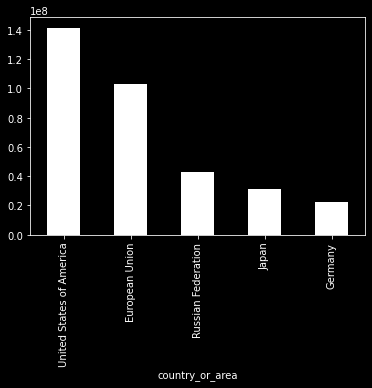

In [26]:
plt.style.use("dark_background")
head_sorted_df_carbon_sum.plot(kind="bar", color="white" )

In [27]:
df_carbon_sum_year = df_carbon.groupby('year').sum().sort_index(ascending=False)
df_carbon_sum_year 

,value
year,
2014,1.720950e+07
2013,1.758251e+07
2012,1.765477e+07
2011,1.791327e+07
2010,1.819953e+07
2009,1.758059e+07
2008,1.896770e+07
2007,1.944015e+07
2006,1.936924e+07


<AxesSubplot:ylabel='year'>

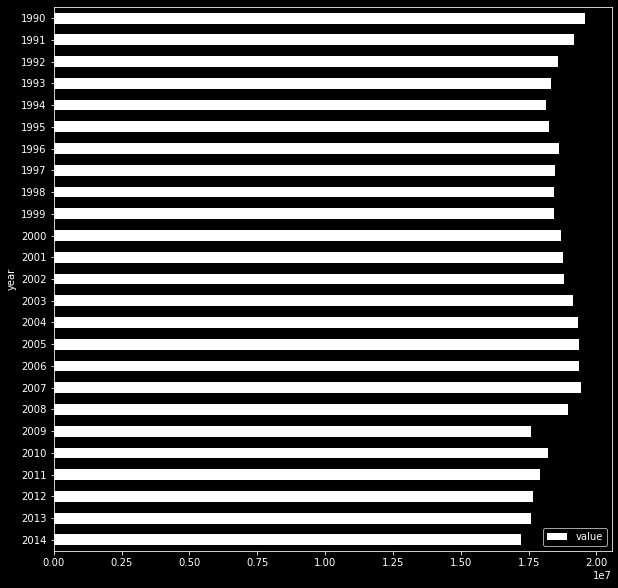

In [28]:
df_carbon_sum_year.plot(kind="barh", figsize=(10,10), color="white")

In [29]:
# 자연흡수량은 제외한 순수 온실가스 배출량
df_gas_includ.info

<bound method DataFrame.info of                country_or_area  year         value  \
1074                 Australia  2014  5.223971e+05   
1075                 Australia  2013  5.268827e+05   
1076                 Australia  2012  5.373776e+05   
1077                 Australia  2011  5.340898e+05   
1078                 Australia  2010  5.339174e+05   
...                        ...   ...           ...   
2018  United States of America  1994  6.650297e+06   
2019  United States of America  1993  6.566416e+06   
2020  United States of America  1992  6.448677e+06   
2021  United States of America  1991  6.330938e+06   
2022  United States of America  1990  6.397144e+06   

                                               category  
1074  greenhouse_gas_ghgs_emissions_including_indire...  
1075  greenhouse_gas_ghgs_emissions_including_indire...  
1076  greenhouse_gas_ghgs_emissions_including_indire...  
1077  greenhouse_gas_ghgs_emissions_including_indire...  
1078  greenhouse_gas_ghgs_emi

In [30]:
df_gas_includ[["value"]].describe()

,value
count,9.490000e+02
mean,5.874106e+05
std,1.391225e+06
min,8.672830e+01
25%,5.023377e+04
50%,8.202159e+04
75%,4.421724e+05
max,7.422208e+06


In [31]:
df_gas_includ_sum = df_gas_includ['value'].groupby(df_gas_includ['country_or_area']).sum()
sorted_df_gas_includ_sum = df_gas_includ_sum.sort_values(ascending=False)
head_sorted_df_gas_includ_sum = sorted_df_gas_includ_sum.head()

<AxesSubplot:xlabel='country_or_area'>

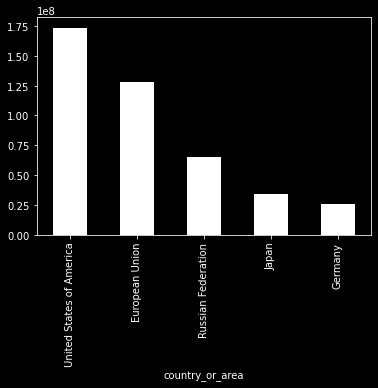

In [32]:
plt.style.use("dark_background")
head_sorted_df_gas_includ_sum.plot(kind="bar", color="white" )

In [33]:
df_gas_includ_sum_year = df_gas_includ.groupby('year').sum().sort_index(ascending=False)
df_gas_includ_sum_year 

,value
year,
2014,2.090702e+07
2013,2.122217e+07
2012,2.125789e+07
2011,2.151672e+07
2010,2.175162e+07
2009,2.111136e+07
2008,2.249868e+07
2007,2.296387e+07
2006,2.287129e+07


<AxesSubplot:ylabel='year'>

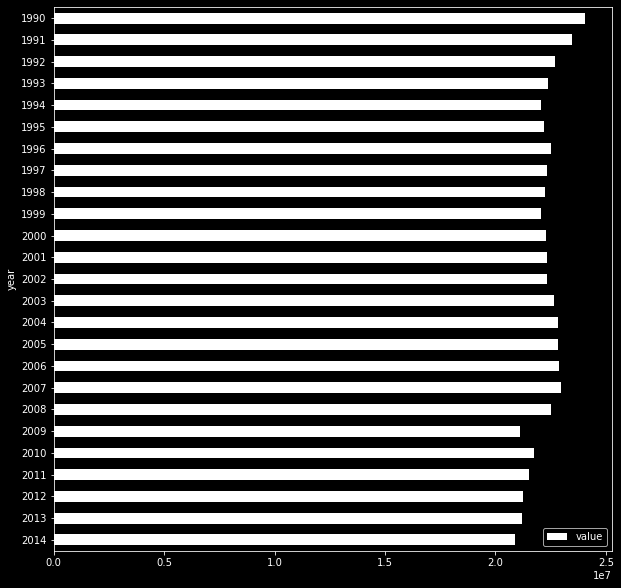

In [34]:
df_gas_includ_sum_year.plot(kind="barh", figsize=(10,10), color="white")

In [35]:
# 토지 범위별 숲의 온실가스 흡수량
df_gas_out.info

<bound method DataFrame.info of                country_or_area  year         value  \
2023                 Australia  2014  5.223971e+05   
2024                 Australia  2013  5.268827e+05   
2025                 Australia  2012  5.373776e+05   
2026                 Australia  2011  5.340898e+05   
2027                 Australia  2010  5.339174e+05   
...                        ...   ...           ...   
3092  United States of America  1994  6.650297e+06   
3093  United States of America  1993  6.566416e+06   
3094  United States of America  1992  6.448677e+06   
3095  United States of America  1991  6.330938e+06   
3096  United States of America  1990  6.397144e+06   

                                               category  
2023  greenhouse_gas_ghgs_emissions_without_land_use...  
2024  greenhouse_gas_ghgs_emissions_without_land_use...  
2025  greenhouse_gas_ghgs_emissions_without_land_use...  
2026  greenhouse_gas_ghgs_emissions_without_land_use...  
2027  greenhouse_gas_ghgs_emi

In [36]:
df_gas_out[["value"]].describe()

,value
count,1.074000e+03
mean,5.448683e+05
std,1.315580e+06
min,8.672830e+01
25%,3.103084e+04
50%,8.039956e+04
75%,4.337441e+05
max,7.422208e+06


In [37]:
df_gas_out_sum = df_gas_out['value'].groupby(df_gas_out['country_or_area']).sum()
sorted_df_gas_out_sum = df_gas_out_sum.sort_values(ascending=False)
head_sorted_df_gas_out_sum = sorted_df_gas_out_sum.head()

<AxesSubplot:xlabel='country_or_area'>

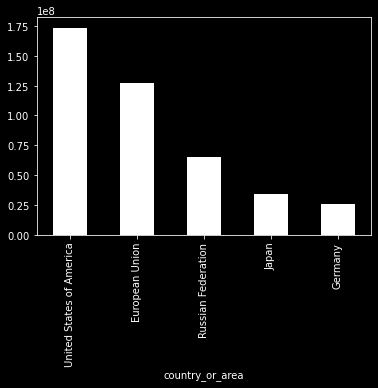

In [38]:
plt.style.use("dark_background")
head_sorted_df_gas_out_sum.plot(kind="bar", color="white" )

In [39]:
df_gas_out_sum_year = df_gas_out.groupby('year').sum().sort_index(ascending=False)
df_gas_out_sum_year 

,value
year,
2014,2.180341e+07
2013,2.216624e+07
2012,2.224357e+07
2011,2.249399e+07
2010,2.277291e+07
2009,2.213277e+07
2008,2.362539e+07
2007,2.413944e+07
2006,2.404608e+07


<AxesSubplot:ylabel='year'>

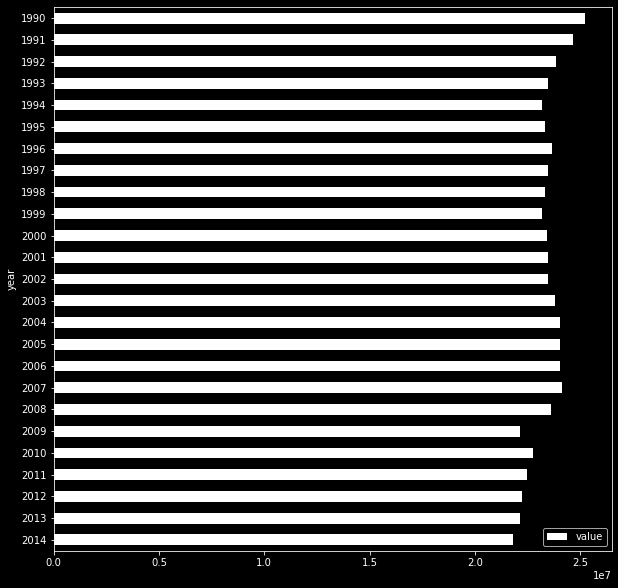

In [40]:
df_gas_out_sum_year.plot(kind="barh", figsize=(10,10), color="white")

In [41]:
# 수소화불화탄소 (주로 냉매로 사용됌)
df_HFCs.info

<bound method DataFrame.info of                country_or_area  year         value  \
3097                 Australia  2014  10787.350138   
3098                 Australia  2013  10034.127624   
3099                 Australia  2012   9353.066412   
3100                 Australia  2011   8837.850581   
3101                 Australia  2010   8166.067244   
...                        ...   ...           ...   
4067  United States of America  1994  53246.654974   
4068  United States of America  1993  47500.262267   
4069  United States of America  1992  47427.662176   
4070  United States of America  1991  41618.413588   
4071  United States of America  1990  46288.814184   

                                               category  
3097  hydrofluorocarbons_hfcs_emissions_in_kilotonne...  
3098  hydrofluorocarbons_hfcs_emissions_in_kilotonne...  
3099  hydrofluorocarbons_hfcs_emissions_in_kilotonne...  
3100  hydrofluorocarbons_hfcs_emissions_in_kilotonne...  
3101  hydrofluorocarbons_hfcs

In [42]:
df_HFCs[["value"]].describe()

,value
count,975.000000
mean,7459.376347
std,20689.859710
min,0.000072
25%,94.093743
50%,747.113470
75%,4687.462634
max,157237.344889


In [43]:
df_HFCs_sum = df_HFCs['value'].groupby(df_HFCs['country_or_area']).sum()
sorted_df_HFCs_sum = df_HFCs_sum.sort_values(ascending=False)
head_sorted_df_HFCs_sum = sorted_df_HFCs_sum.head()

<AxesSubplot:xlabel='country_or_area'>

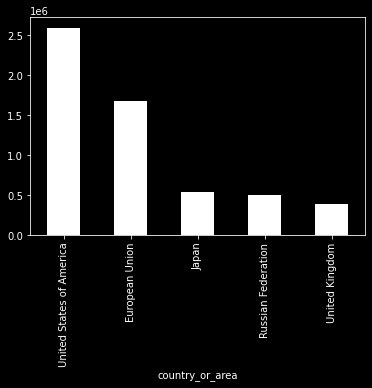

In [44]:
plt.style.use("dark_background")
head_sorted_df_HFCs_sum.plot(kind="bar", color="white" )

In [45]:
df_HFCs_sum_year = df_HFCs.groupby('year').sum().sort_index(ascending=False)
df_HFCs_sum_year 

,value
year,
2014,472861.182681
2013,453782.413295
2012,438664.262586
2011,420021.672825
2010,407806.417215
2009,374770.861530
2008,369473.436270
2007,345487.863264
2006,319144.056712


<AxesSubplot:ylabel='year'>

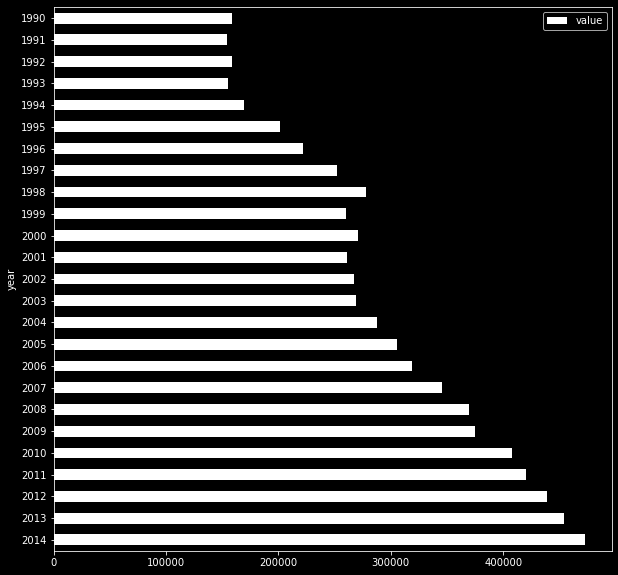

In [46]:
df_HFCs_sum_year.plot(kind="barh", figsize=(10,10), color="white")

In [47]:
# 삼불화질소(오존에 550년간 머물며, CO2의 265배정도의 온실효과 발생시킴)
df_NF3.info

<bound method DataFrame.info of                country_or_area  year      value  \
5146                   Austria  2014  10.562520   
5147                   Austria  2013   9.752400   
5148                   Austria  2012   8.563880   
5149                   Austria  2011   4.102200   
5150                   Austria  2010   4.115960   
...                        ...   ...        ...   
5389  United States of America  1994  65.892167   
5390  United States of America  1993  59.901970   
5391  United States of America  1992  47.921576   
5392  United States of America  1991  47.921576   
5393  United States of America  1990  47.921576   

                                               category  
5146  nitrogen_trifluoride_nf3_emissions_in_kilotonn...  
5147  nitrogen_trifluoride_nf3_emissions_in_kilotonn...  
5148  nitrogen_trifluoride_nf3_emissions_in_kilotonn...  
5149  nitrogen_trifluoride_nf3_emissions_in_kilotonn...  
5150  nitrogen_trifluoride_nf3_emissions_in_kilotonn...  
...    

In [48]:
df_NF3[["value"]].describe()

,value
count,248.000000
mean,113.467226
std,267.025197
min,0.055900
25%,1.262596
50%,20.977292
75%,62.548292
max,1561.299969


In [49]:
df_NF3_sum = df_NF3['value'].groupby(df_NF3['country_or_area']).sum()
sorted_df_NF3_sum = df_NF3_sum.sort_values(ascending=False)
head_sorted_df_NF3_sum = sorted_df_NF3_sum.head()

<AxesSubplot:xlabel='country_or_area'>

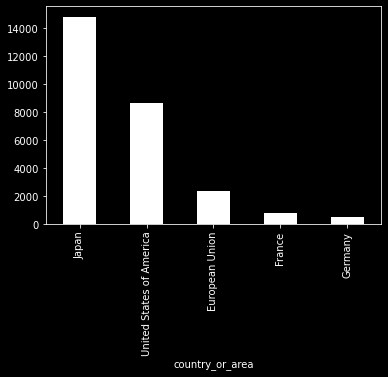

In [50]:
plt.style.use("dark_background")
head_sorted_df_NF3_sum.plot(kind="bar", color="white" )

In [51]:
df_NF3_sum_year = df_NF3.groupby('year').sum().sort_index(ascending=False)
df_NF3_sum_year 

,value
year,
2014,1470.387623
2013,2098.531341
2012,2074.333312
2011,2491.043659
2010,2179.128434
2009,1798.469370
2008,2066.992034
2007,2111.235547
2006,2077.017963


<AxesSubplot:ylabel='year'>

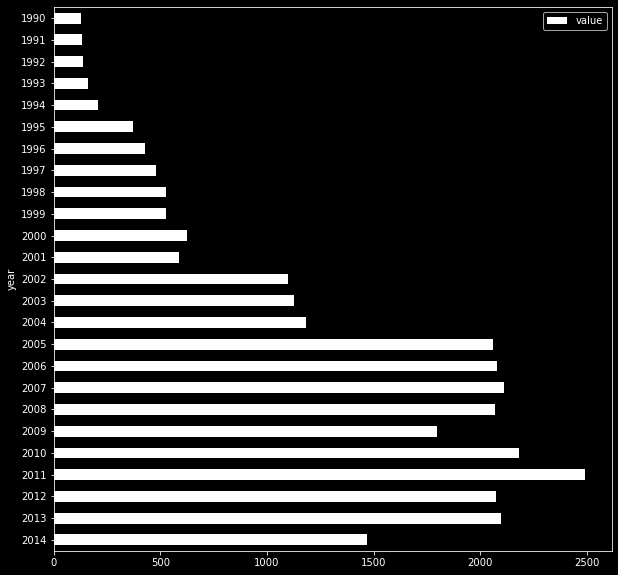

In [52]:
df_NF3_sum_year.plot(kind="barh", figsize=(10,10), color="white")

NF3 규제 (2013): https://www.wri.org/insights/nitrogen-trifluoride-now-required-ghg-protocol-greenhouse-gas-emissions-inventories

In [53]:
# 아산화질소 (태양빛의 방사선을 흡수하여 온실효과 발생시킴)
df_N2O.info

<bound method DataFrame.info of                country_or_area  year          value  \
5394                 Australia  2014   20084.542834   
5395                 Australia  2013   19756.452647   
5396                 Australia  2012   20342.383478   
5397                 Australia  2011   20034.575149   
5398                 Australia  2010   19698.298820   
...                        ...   ...            ...   
6463  United States of America  1994  402478.930460   
6464  United States of America  1993  420503.190940   
6465  United States of America  1992  404052.107073   
6466  United States of America  1991  396113.656867   
6467  United States of America  1990  406228.526626   

                                               category  
5394  nitrous_oxide_n2o_emissions_without_land_use_l...  
5395  nitrous_oxide_n2o_emissions_without_land_use_l...  
5396  nitrous_oxide_n2o_emissions_without_land_use_l...  
5397  nitrous_oxide_n2o_emissions_without_land_use_l...  
5398  nitrous_oxi

In [54]:
df_N2O.describe()

,year,value
count,1074.000000,1074.000000
mean,2001.988827,29922.486723
std,7.208509,76097.510577
min,1990.000000,1.645551
25%,1996.000000,2583.225829
50%,2002.000000,6634.584903
75%,2008.000000,20315.661481
max,2014.000000,433872.649154


In [55]:
df_N2O_sum = df_N2O['value'].groupby(df_N2O['country_or_area']).sum()
sorted_df_N2O_sum = df_N2O_sum.sort_values(ascending=False)
head_sorted_df_N2O_sum = sorted_df_N2O_sum.head()

<AxesSubplot:xlabel='country_or_area'>

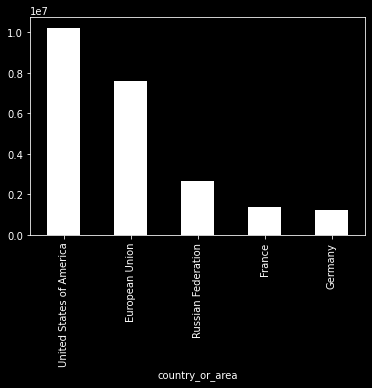

In [56]:
plt.style.use("dark_background")
head_sorted_df_N2O_sum.plot(kind="bar", color="white" )

In [57]:
df_N2O_sum_year = df_N2O.groupby('year').sum().sort_index(ascending=False)
df_N2O_sum_year 

,value
year,
2014,1.138729e+06
2013,1.135355e+06
2012,1.137160e+06
2011,1.145151e+06
2010,1.146164e+06
2009,1.149592e+06
2008,1.180266e+06
2007,1.221697e+06
2006,1.215054e+06


<AxesSubplot:ylabel='year'>

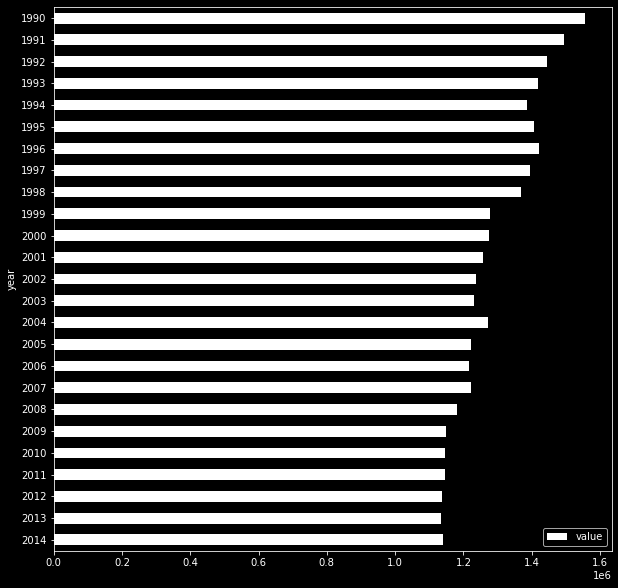

In [58]:
df_N2O_sum_year.plot(kind="barh", figsize=(10,10), color="white")

In [59]:
# 사불화탄소 (CO2의 1000~3000배정도의 온난화 잠재력을 보유)
df_CF4.info

<bound method DataFrame.info of                country_or_area  year         value  \
6468                 Australia  2014    192.535991   
6469                 Australia  2013    192.001236   
6470                 Australia  2012    294.882947   
6471                 Australia  2011    301.304840   
6472                 Australia  2010    283.315235   
...                        ...   ...           ...   
7294  United States of America  1994  17965.003964   
7295  United States of America  1993  19484.617791   
7296  United States of America  1992  19481.087044   
7297  United States of America  1991  20912.457841   
7298  United States of America  1990  24255.671543   

                                               category  
6468  perfluorocarbons_pfcs_emissions_in_kilotonne_c...  
6469  perfluorocarbons_pfcs_emissions_in_kilotonne_c...  
6470  perfluorocarbons_pfcs_emissions_in_kilotonne_c...  
6471  perfluorocarbons_pfcs_emissions_in_kilotonne_c...  
6472  perfluorocarbons_pfcs_e

In [60]:
df_CF4.describe()

,year,value
count,831.000000,831.000000
mean,2002.317690,1823.313419
std,7.139921,3864.704285
min,1990.000000,0.000001
25%,1996.000000,41.595919
50%,2002.000000,212.887732
75%,2008.000000,1656.134687
max,2014.000000,25369.662019


In [61]:
df_CF4_sum = df_CF4['value'].groupby(df_CF4['country_or_area']).sum()
sorted_df_CF4_sum = df_CF4_sum.sort_values(ascending=False)
head_sorted_df_CF4_sum = sorted_df_CF4_sum.head()

<AxesSubplot:xlabel='country_or_area'>

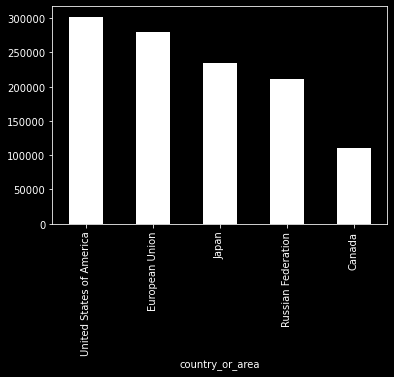

In [62]:
plt.style.use("dark_background")
head_sorted_df_CF4_sum.plot(kind="bar", color="white" )

In [63]:
df_CF4_sum_year = df_CF4.groupby('year').sum().sort_index(ascending=False)
df_CF4_sum_year 

,value
year,
2014,20703.192674
2013,22625.735778
2012,22697.502715
2011,24989.449691
2010,22833.788595
2009,21681.546304
2008,31652.057662
2007,37308.594329
2006,39409.621995


<AxesSubplot:ylabel='year'>

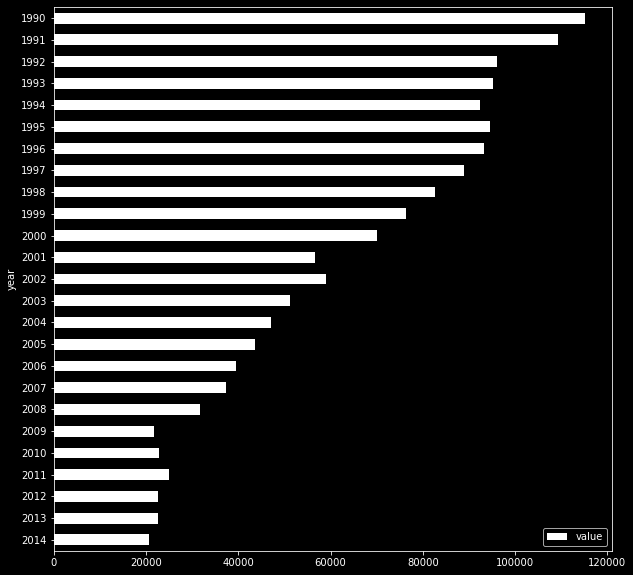

In [64]:
df_CF4_sum_year.plot(kind="barh", figsize=(10,10), color="white")

In [65]:
# 육불화황(100년 넘도록 오존에서 사라지지 않으며 CO2의 2,2000배 가량의 온난화 잠재력 보유)
df_SF6.info

<bound method DataFrame.info of                country_or_area  year         value  \
7299                 Australia  2014    129.605354   
7300                 Australia  2013    128.944604   
7301                 Australia  2012    127.552168   
7302                 Australia  2011    125.001945   
7303                 Australia  2010    121.031654   
...                        ...   ...           ...   
8326  United States of America  1994  28004.247351   
8327  United States of America  1993  29432.652199   
8328  United States of America  1992  29949.821295   
8329  United States of America  1991  29764.563408   
8330  United States of America  1990  31080.406159   

                                               category  
7299  sulphur_hexafluoride_sf6_emissions_in_kilotonn...  
7300  sulphur_hexafluoride_sf6_emissions_in_kilotonn...  
7301  sulphur_hexafluoride_sf6_emissions_in_kilotonn...  
7302  sulphur_hexafluoride_sf6_emissions_in_kilotonn...  
7303  sulphur_hexafluoride_sf

In [66]:
df_SF6.describe()

,year,value
count,1032.000000,1032.000000
mean,2002.337209,1204.614834
std,7.070975,3675.280918
min,1990.000000,0.000456
25%,1996.000000,5.109643
50%,2002.000000,52.634749
75%,2008.000000,442.487524
max,2014.000000,31080.406159


In [67]:
df_SF6_sum = df_SF6['value'].groupby(df_SF6['country_or_area']).sum()
sorted_df_SF6_sum = df_SF6_sum.sort_values(ascending=False)
head_sorted_df_SF6_sum = sorted_df_SF6_sum.head()

<AxesSubplot:xlabel='country_or_area'>

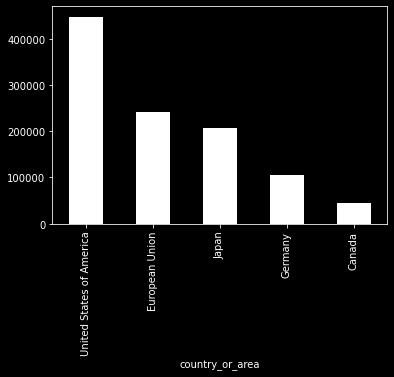

In [68]:
plt.style.use("dark_background")
head_sorted_df_SF6_sum.plot(kind="bar", color="white" )

In [69]:
df_SF6_sum_year = df_SF6.groupby('year').sum().sort_index(ascending=False)
df_SF6_sum_year 

,value
year,
2014,23315.705903
2013,27551.190682
2012,29460.918449
2011,26868.498081
2010,26936.872977
2009,26608.209179
2008,30584.147232
2007,33552.057532
2006,37263.376096


<AxesSubplot:ylabel='year'>

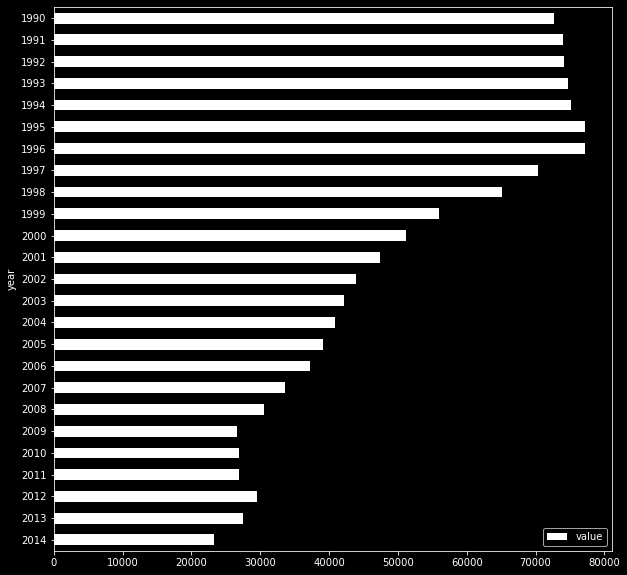

In [70]:
df_SF6_sum_year.plot(kind="barh", figsize=(10,10), color="white")

In [71]:
# 메탄가스 (오존에서 20년동안 머물며, CO2의 20배정도의 온실효과를 발생시킴)
df_CH4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 4072 to 5145
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  1074 non-null   object 
 1   year             1074 non-null   int64  
 2   value            1074 non-null   float64
 3   category         1074 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 42.0+ KB


In [72]:
df_CH4[["value"]].describe()

,value
count,1074.000000
mean,73302.713114
std,175440.581069
min,0.849257
25%,4371.571186
50%,11911.258116
75%,48126.335763
max,942383.462118


In [73]:
df_CH4_sum = df_CH4['value'].groupby(df_CH4['country_or_area']).sum()
sorted_df_CH4_sum = df_CH4_sum.sort_values(ascending=False)
head_sorted_df_CH4_sum = sorted_df_CH4_sum.head()

<AxesSubplot:xlabel='country_or_area'>

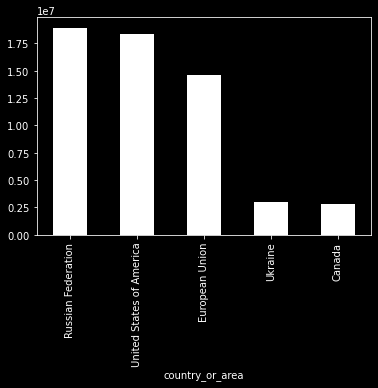

In [74]:
plt.style.use("dark_background")
head_sorted_df_CH4_sum.plot(kind="bar", color="white" ) #CH4 발생순위 TOP5

In [75]:
df_CH4_sum_year = df_CH4.groupby('year').sum().sort_index(ascending=False)
df_CH4_sum_year 

,value
year,
2014,2.927076e+06
2013,2.932934e+06
2012,2.949793e+06
2011,2.952670e+06
2010,2.958963e+06
2009,2.968152e+06
2008,3.035082e+06
2007,3.051411e+06
2006,3.056150e+06


<AxesSubplot:ylabel='year'>

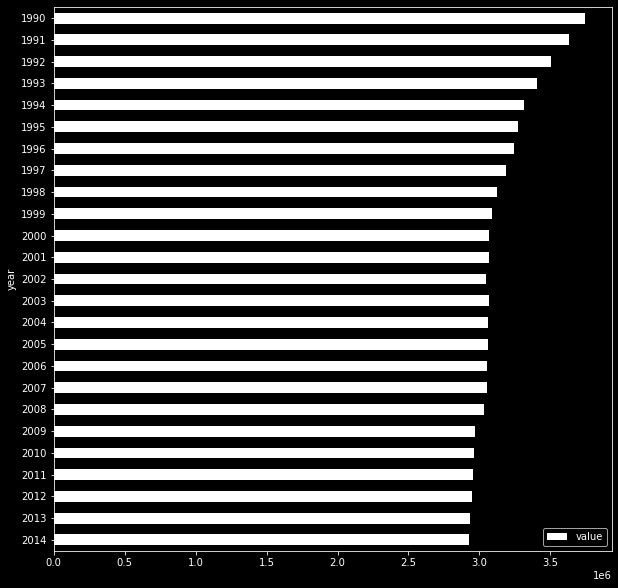

In [76]:
df_CH4_sum_year.plot(kind="barh", figsize=(10,10), color="white")

#### 권지현 파트

#### 이산화탄소 배출량 csv 파일 데이터 주소:
Data_Source_URL: https://www.kaggle.com/srikantsahu/co2-and-ghg-emission-data

#### *데이터 적재

In [77]:
df_emission = pd.read_csv('emission_data.csv')
df_emission

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Wallis and Futuna Islands,0,0,0,0,0,0,0,0,0,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05
227,World,9350528,18704720,28058912,37416768,46778288,56784672,66794720,76808432,86825808,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12
228,Yemen,0,0,0,0,0,0,0,0,0,...,4.285533e+08,4.528009e+08,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08
229,Zambia,0,0,0,0,0,0,0,0,0,...,1.543919e+08,1.567982e+08,1.593608e+08,1.621534e+08,1.656340e+08,1.693902e+08,1.736459e+08,1.780473e+08,1.826225e+08,1.873686e+08


#### *데이터 변형

In [78]:
df_emission[df_emission.columns[195:]]

,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.465600e+04,9.892800e+04,1.905280e+05,2.821280e+05,3.883840e+05,4.946400e+05,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,1.358003e+09,1.426172e+09,1.494124e+09,1.565869e+09,1.643223e+09,1.738165e+09,1.839368e+09,1.949794e+09,2.061872e+09,2.179512e+09,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,4.037728e+06,4.521376e+06,5.448368e+06,6.151856e+06,7.166784e+06,7.463568e+06,7.866608e+06,8.240336e+06,8.654368e+06,9.156336e+06,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,4.085360e+06,4.847472e+06,5.591264e+06,6.393680e+06,7.302352e+06,1.108726e+07,1.522026e+07,1.911142e+07,2.311251e+07,2.726749e+07,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,7.199416e+09,7.594307e+09,7.952650e+09,8.337267e+09,8.596125e+09,8.912519e+09,9.266490e+09,9.625559e+09,9.985569e+09,1.036595e+10,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05
227,2.050000e+11,2.100000e+11,2.150000e+11,2.210000e+11,2.260000e+11,2.320000e+11,2.380000e+11,2.440000e+11,2.510000e+11,2.570000e+11,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12
228,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.862400e+04,9.892800e+04,1.575520e+05,2.271680e+05,4.682592e+06,...,4.285533e+08,4.528009e+08,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08
229,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.543919e+08,1.567982e+08,1.593608e+08,1.621534e+08,1.656340e+08,1.693902e+08,1.736459e+08,1.780473e+08,1.826225e+08,1.873686e+08


In [79]:
a = df_emission[df_emission.columns[195:]]
a

,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.465600e+04,9.892800e+04,1.905280e+05,2.821280e+05,3.883840e+05,4.946400e+05,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,1.358003e+09,1.426172e+09,1.494124e+09,1.565869e+09,1.643223e+09,1.738165e+09,1.839368e+09,1.949794e+09,2.061872e+09,2.179512e+09,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,4.037728e+06,4.521376e+06,5.448368e+06,6.151856e+06,7.166784e+06,7.463568e+06,7.866608e+06,8.240336e+06,8.654368e+06,9.156336e+06,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,4.085360e+06,4.847472e+06,5.591264e+06,6.393680e+06,7.302352e+06,1.108726e+07,1.522026e+07,1.911142e+07,2.311251e+07,2.726749e+07,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,7.199416e+09,7.594307e+09,7.952650e+09,8.337267e+09,8.596125e+09,8.912519e+09,9.266490e+09,9.625559e+09,9.985569e+09,1.036595e+10,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05
227,2.050000e+11,2.100000e+11,2.150000e+11,2.210000e+11,2.260000e+11,2.320000e+11,2.380000e+11,2.440000e+11,2.510000e+11,2.570000e+11,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12
228,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.862400e+04,9.892800e+04,1.575520e+05,2.271680e+05,4.682592e+06,...,4.285533e+08,4.528009e+08,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08
229,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.543919e+08,1.567982e+08,1.593608e+08,1.621534e+08,1.656340e+08,1.693902e+08,1.736459e+08,1.780473e+08,1.826225e+08,1.873686e+08


In [80]:
a.index = df_emission["Country"]

In [81]:
a

,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.465600e+04,9.892800e+04,1.905280e+05,2.821280e+05,3.883840e+05,4.946400e+05,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
Africa,1.358003e+09,1.426172e+09,1.494124e+09,1.565869e+09,1.643223e+09,1.738165e+09,1.839368e+09,1.949794e+09,2.061872e+09,2.179512e+09,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
Albania,4.037728e+06,4.521376e+06,5.448368e+06,6.151856e+06,7.166784e+06,7.463568e+06,7.866608e+06,8.240336e+06,8.654368e+06,9.156336e+06,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
Algeria,4.085360e+06,4.847472e+06,5.591264e+06,6.393680e+06,7.302352e+06,1.108726e+07,1.522026e+07,1.911142e+07,2.311251e+07,2.726749e+07,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
Americas (other),7.199416e+09,7.594307e+09,7.952650e+09,8.337267e+09,8.596125e+09,8.912519e+09,9.266490e+09,9.625559e+09,9.985569e+09,1.036595e+10,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05
World,2.050000e+11,2.100000e+11,2.150000e+11,2.210000e+11,2.260000e+11,2.320000e+11,2.380000e+11,2.440000e+11,2.510000e+11,2.570000e+11,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12
Yemen,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.862400e+04,9.892800e+04,1.575520e+05,2.271680e+05,4.682592e+06,...,4.285533e+08,4.528009e+08,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08


In [82]:
b = a.mean()
c = b.sort_index(ascending = False)
c

2017    1.732373e+10
2016    1.691931e+10
2015    1.653158e+10
2014    1.617543e+10
2013    1.578588e+10
            ...     
1949    2.470732e+09
1948    2.418150e+09
1947    2.360530e+09
1946    2.308790e+09
1945    2.259798e+09
Length: 73, dtype: float64

#### 연평균 이산화탄소 배출량 증가 그래프(1945-2017)

Text(0, 0.5, 'year')

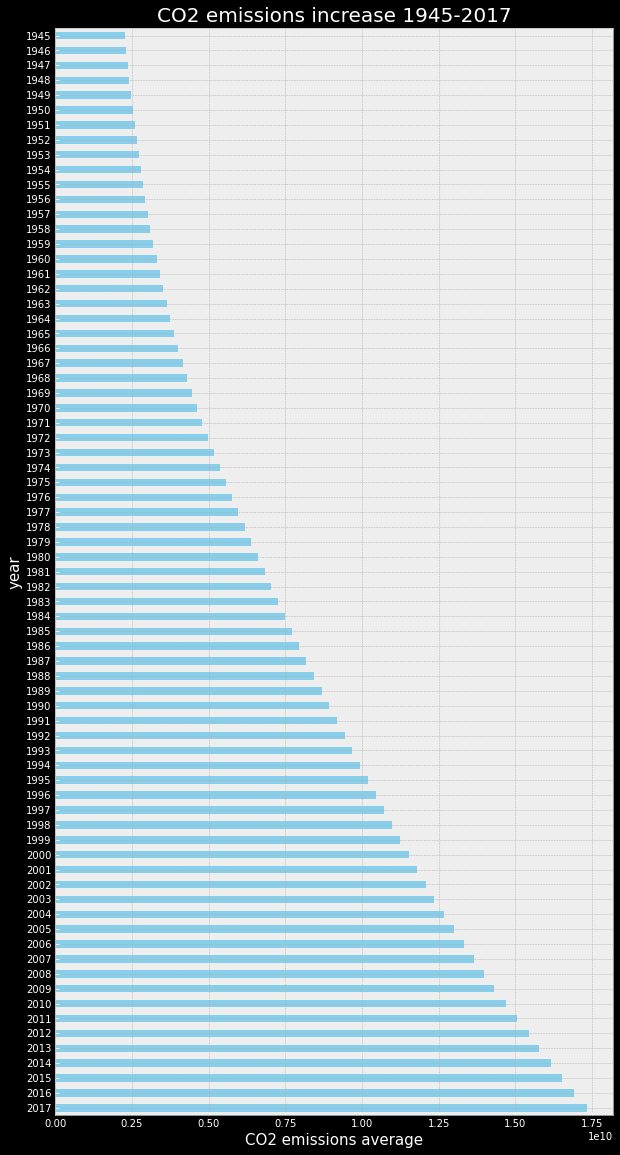

In [83]:
plt.style.use("bmh")
c.plot(kind = "barh", color = "skyblue", figsize = (10, 20))
plt.title("CO2 emissions increase 1945-2017", size = 20)
plt.xlabel("CO2 emissions average", size = 15)
plt.ylabel("year", size = 15)

#### 김재민 파트

#### DataSet_Source_URL:  "https://data.giss.nasa.gov/gistemp/

데이터에 대한 기본 설명 - 지구의 온도를 연관된 육지-표면 대기온도와 바다-표면 수온온도를 연관시켜서 만든 표, 
줄여서 표현하면 육지-해양 온도 지수
그리고 육지-해양 온도를 1951~1980년을 평균으로 해서 육지-해양 온도를 표시한 것

즉 어떤 연도의 온도가 0 이면 1951~1980년의 육지-해양 온도 평균이랑 동일한 온도

#### *데이터 적재

In [84]:
df_global = pd.read_csv('Global-Month-Annual-season.csv')
df_global
#전세계 데이터

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.14,-0.23,-0.21,-0.17,-0.16,***,***,-0.11,-0.15,-0.19
1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.18,0.01,-0.02,-0.14,-0.21,-0.17,-0.06,-0.08,-0.08,-0.16,0.06,-0.06,-0.17
2,1882,0.17,0.15,0.05,-0.16,-0.14,-0.22,-0.15,-0.06,-0.13,-0.23,-0.15,-0.35,-0.1,-0.08,0.09,-0.08,-0.14,-0.17
3,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.13,-0.2,-0.1,-0.22,-0.1,-0.16,-0.18,-0.33,-0.15,-0.08,-0.18
4,1884,-0.12,-0.06,-0.35,-0.40,-0.33,-0.35,-0.31,-0.26,-0.26,-0.24,-0.33,-0.3,-0.28,-0.26,-0.1,-0.36,-0.31,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2017,1.02,1.14,1.17,0.94,0.91,0.72,0.81,0.87,0.77,0.9,0.88,0.94,0.92,0.91,1.01,1.01,0.8,0.85
138,2018,0.81,0.84,0.88,0.89,0.82,0.77,0.82,0.76,0.8,1.01,0.83,0.92,0.85,0.85,0.86,0.86,0.78,0.88
139,2019,0.93,0.95,1.17,1.01,0.85,0.91,0.94,0.94,0.92,1.01,1,1.09,0.98,0.96,0.93,1.01,0.93,0.98
140,2020,1.17,1.24,1.17,1.13,1.02,0.92,0.9,0.87,0.99,0.88,1.1,0.81,1.02,1.04,1.17,1.11,0.89,0.99


In [85]:
df_north = pd.read_csv('North-Month-Annual-season.csv')
df_north
#북반구 데이터

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.35,-0.50,-0.23,-0.29,-0.05,-0.15,-0.17,-0.25,-0.22,-0.31,-0.42,-0.39,-0.28,***,***,-0.19,-0.19,-0.32
1,1881,-0.30,-0.21,-0.03,0.01,0.05,-0.32,0.09,-0.03,-0.25,-0.42,-0.36,-0.22,-0.17,-0.18,-0.3,0.01,-0.09,-0.35
2,1882,0.28,0.22,0.03,-0.31,-0.24,-0.29,-0.26,-0.13,-0.23,-0.51,-0.32,-0.66,-0.2,-0.17,0.09,-0.17,-0.23,-0.35
3,1883,-0.56,-0.65,-0.14,-0.28,-0.23,-0.11,-0.02,-0.2,-0.3,-0.15,-0.41,-0.14,-0.27,-0.31,-0.63,-0.22,-0.11,-0.29
4,1884,-0.16,-0.08,-0.62,-0.59,-0.36,-0.42,-0.42,-0.48,-0.43,-0.44,-0.57,-0.47,-0.42,-0.39,-0.13,-0.52,-0.44,-0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2017,1.39,1.52,1.52,1.20,0.92,0.93,0.97,1.02,1,1.05,1.23,1.4,1.18,1.15,1.32,1.22,0.97,1.09
138,2018,1.14,1.24,1.16,0.97,1.01,0.87,0.9,0.87,0.97,1.24,0.98,1.11,1.04,1.06,1.26,1.05,0.88,1.06
139,2019,1.21,1.13,1.55,1.25,0.99,1.20,1.04,1.09,1.21,1.31,1.21,1.4,1.22,1.19,1.15,1.26,1.11,1.24
140,2020,1.59,1.70,1.67,1.42,1.28,1.13,1.11,1.13,1.2,1.22,1.62,1.23,1.36,1.37,1.56,1.46,1.12,1.35


In [86]:
df_south = pd.read_csv('South-Month-Annual-season.csv')
df_south
# 남반구 데이터

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,0.01,0.04,0.06,-0.01,-0.12,-0.24,-0.16,0.07,-0.05,-0.14,0.01,0.06,-0.04,***,***,-0.02,-0.11,-0.06
1,1881,-0.08,-0.05,0.10,0.10,0.09,-0.05,-0.07,-0.02,-0.04,0,0.01,0.1,0.01,0.01,-0.02,0.10,-0.04,-0.01
2,1882,0.07,0.08,0.08,-0.01,-0.03,-0.15,-0.04,0.01,-0.04,0.04,0,-0.06,0,0.01,0.08,0.01,-0.06,0
3,1883,-0.02,-0.08,-0.08,-0.07,-0.09,-0.02,-0.08,-0.05,-0.1,-0.06,-0.04,-0.06,-0.06,-0.06,-0.05,-0.08,-0.05,-0.06
4,1884,-0.08,-0.05,-0.10,-0.21,-0.31,-0.29,-0.21,-0.06,-0.11,-0.06,-0.1,-0.15,-0.14,-0.14,-0.06,-0.21,-0.19,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2017,0.65,0.75,0.80,0.69,0.89,0.52,0.66,0.72,0.54,0.74,0.52,0.46,0.66,0.68,0.69,0.79,0.63,0.6
138,2018,0.47,0.44,0.60,0.79,0.63,0.68,0.74,0.65,0.64,0.79,0.68,0.72,0.65,0.63,0.46,0.68,0.69,0.7
139,2019,0.65,0.77,0.79,0.77,0.71,0.62,0.85,0.78,0.63,0.71,0.8,0.79,0.74,0.73,0.72,0.75,0.75,0.71
140,2020,0.74,0.77,0.67,0.85,0.76,0.71,0.69,0.61,0.77,0.55,0.59,0.39,0.68,0.71,0.77,0.76,0.67,0.64


In [87]:
df_global.describe()
#df_global 데이터 프레임에 대한 설명

,Year,Jan,Feb,Mar,Apr,May,Jun,MAM
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1950.500000,0.052676,0.059577,0.074155,0.051690,0.042042,0.026479,0.055704
std,41.135953,0.411937,0.416924,0.417579,0.385575,0.366220,0.360367,0.385082
min,1880.000000,-0.800000,-0.630000,-0.630000,-0.590000,-0.550000,-0.510000,-0.580000
25%,1915.250000,-0.240000,-0.240000,-0.220000,-0.250000,-0.247500,-0.240000,-0.250000
50%,1950.500000,-0.015000,-0.040000,0.010000,-0.035000,-0.045000,-0.060000,-0.030000
75%,1985.750000,0.300000,0.370000,0.300000,0.277500,0.270000,0.230000,0.295000
max,2021.000000,1.170000,1.370000,1.360000,1.130000,1.020000,0.920000,1.140000


In [88]:
df_global.index
#df_global 인덱스 확인

RangeIndex(start=0, stop=142, step=1)

In [89]:
df_global.columns
#df_global 컬럼 확인

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [90]:
df_global.info()
#df_global 전체 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    142 non-null    int64  
 1   Jan     142 non-null    float64
 2   Feb     142 non-null    float64
 3   Mar     142 non-null    float64
 4   Apr     142 non-null    float64
 5   May     142 non-null    float64
 6   Jun     142 non-null    float64
 7   Jul     142 non-null    object 
 8   Aug     142 non-null    object 
 9   Sep     142 non-null    object 
 10  Oct     142 non-null    object 
 11  Nov     142 non-null    object 
 12  Dec     142 non-null    object 
 13  J-D     142 non-null    object 
 14  D-N     142 non-null    object 
 15  DJF     142 non-null    object 
 16  MAM     142 non-null    float64
 17  JJA     142 non-null    object 
 18  SON     142 non-null    object 
dtypes: float64(7), int64(1), object(11)
memory usage: 21.2+ KB


In [91]:
df_global.isnull().sum()
#df_global null값 확인

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64

In [92]:
df_global_resize = df_global.loc[ ( df_global['Year'] > 1944 ) & ( df_global['Year'] < 2021) , :]
df_global_resize
#전세계 데이터중 필요한 연도 - 1945~2020까지 resize

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
65,1945,0.10,0.00,0.06,0.19,0.05,0.00,0.03,0.26,0.2,0.18,0.07,-0.07,0.09,0.1,0.04,0.10,0.1,0.15
66,1946,0.15,0.02,0.01,0.05,-0.07,-0.21,-0.12,-0.2,-0.08,-0.08,-0.05,-0.31,-0.07,-0.05,0.04,0.00,-0.18,-0.07
67,1947,-0.07,-0.08,0.06,0.06,-0.02,-0.02,-0.04,-0.07,-0.13,0.07,0.03,-0.13,-0.03,-0.04,-0.15,0.03,-0.04,-0.01
68,1948,0.06,-0.15,-0.25,-0.12,-0.01,-0.05,-0.11,-0.12,-0.15,-0.05,-0.12,-0.24,-0.11,-0.1,-0.07,-0.12,-0.09,-0.11
69,1949,0.07,-0.14,-0.02,-0.11,-0.10,-0.27,-0.13,-0.13,-0.15,-0.07,-0.1,-0.18,-0.11,-0.12,-0.1,-0.08,-0.18,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,1.17,1.37,1.36,1.11,0.95,0.80,0.85,1.01,0.9,0.88,0.91,0.86,1.01,1.04,1.23,1.14,0.89,0.9
137,2017,1.02,1.14,1.17,0.94,0.91,0.72,0.81,0.87,0.77,0.9,0.88,0.94,0.92,0.91,1.01,1.01,0.8,0.85
138,2018,0.81,0.84,0.88,0.89,0.82,0.77,0.82,0.76,0.8,1.01,0.83,0.92,0.85,0.85,0.86,0.86,0.78,0.88
139,2019,0.93,0.95,1.17,1.01,0.85,0.91,0.94,0.94,0.92,1.01,1,1.09,0.98,0.96,0.93,1.01,0.93,0.98


In [93]:
df_north_resize = df_north.loc[ ( df_north['Year'] > 1944 ) & ( df_north['Year'] < 2021) , :]
df_north_resize
#북반구 데이터중 필요한 연도 - 1945~2020까지 

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
65,1945,0.11,-0.06,0.09,0.29,0.08,0.08,0.06,0.28,0.2,0.24,0.09,-0.21,0.1,0.12,0.01,0.15,0.14,0.18
66,1946,0.34,0.09,0.12,0.32,0.03,-0.05,-0.04,-0.1,-0.04,0.02,0.07,-0.45,0.03,0.05,0.08,0.16,-0.06,0.02
67,1947,-0.04,-0.04,0.29,0.22,0.06,0.00,-0.03,-0.04,-0.01,0.41,0.19,-0.05,0.08,0.05,-0.18,0.19,-0.02,0.2
68,1948,0.31,-0.14,-0.27,-0.03,0.17,0.04,0.01,0.03,-0.03,0.08,0.04,-0.39,-0.02,0.01,0.04,-0.04,0.03,0.03
69,1949,0.23,-0.09,0.04,-0.02,0.01,-0.20,-0.11,-0.05,-0.1,0.07,0.05,-0.14,-0.03,-0.05,-0.08,0.01,-0.12,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,1.55,1.94,1.91,1.49,1.12,1.12,1.04,1.12,1.22,1.03,1.12,1.04,1.31,1.35,1.67,1.50,1.09,1.12
137,2017,1.39,1.52,1.52,1.20,0.92,0.93,0.97,1.02,1,1.05,1.23,1.4,1.18,1.15,1.32,1.22,0.97,1.09
138,2018,1.14,1.24,1.16,0.97,1.01,0.87,0.9,0.87,0.97,1.24,0.98,1.11,1.04,1.06,1.26,1.05,0.88,1.06
139,2019,1.21,1.13,1.55,1.25,0.99,1.20,1.04,1.09,1.21,1.31,1.21,1.4,1.22,1.19,1.15,1.26,1.11,1.24


In [94]:
df_south_resize = df_south.loc[ ( df_south['Year'] > 1944 ) & ( df_south['Year'] < 2021) , :]
df_south_resize
#남반구 데이터중 필요한 연도 - 1945-2020까지

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
65,1945,0.09,0.07,0.03,0.09,0.04,-0.06,0.02,0.24,0.21,0.13,0.07,0.08,0.09,0.09,0.09,0.05,0.07,0.14
66,1946,-0.03,-0.03,-0.09,-0.21,-0.17,-0.37,-0.21,-0.31,-0.13,-0.18,-0.18,-0.15,-0.17,-0.15,0.01,-0.15,-0.3,-0.16
67,1947,-0.08,-0.12,-0.17,-0.11,-0.09,-0.04,-0.05,-0.1,-0.24,-0.27,-0.15,-0.22,-0.14,-0.13,-0.12,-0.12,-0.06,-0.22
68,1948,-0.18,-0.15,-0.22,-0.21,-0.18,-0.16,-0.23,-0.26,-0.27,-0.19,-0.28,-0.09,-0.2,-0.21,-0.18,-0.20,-0.22,-0.25
69,1949,-0.10,-0.20,-0.09,-0.20,-0.21,-0.35,-0.16,-0.21,-0.19,-0.21,-0.25,-0.23,-0.2,-0.19,-0.13,-0.16,-0.24,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,0.79,0.79,0.81,0.73,0.79,0.49,0.66,0.91,0.59,0.74,0.7,0.68,0.72,0.73,0.79,0.78,0.69,0.68
137,2017,0.65,0.75,0.80,0.69,0.89,0.52,0.66,0.72,0.54,0.74,0.52,0.46,0.66,0.68,0.69,0.79,0.63,0.6
138,2018,0.47,0.44,0.60,0.79,0.63,0.68,0.74,0.65,0.64,0.79,0.68,0.72,0.65,0.63,0.46,0.68,0.69,0.7
139,2019,0.65,0.77,0.79,0.77,0.71,0.62,0.85,0.78,0.63,0.71,0.8,0.79,0.74,0.73,0.72,0.75,0.75,0.71


In [95]:
df_global_resize['J-D'].sort_values().dtypes

dtype('O')

위에서 설명한 듯이 육지-해양 온도 지수를 J-D로 평균을 잡은것으로 데이터 시각화를 함

참고로 J-D는 그 해의 Jan부터 Dec까지의 육지-해양 온도 지수를 평균으로 계산한것

In [96]:
df_global_resize_float = pd.to_numeric(df_global_resize['J-D'])
#['J-D'] 연평균 온도의 자료형을 float형으로 바꿈

In [97]:
df_global_resize_float.dtypes

dtype('float64')

In [98]:
df_north_resize['J-D'].sort_values().dtypes

dtype('O')

In [99]:
df_north_resize_float = pd.to_numeric(df_north_resize['J-D'])
#['J-D'] 연평균 온도의 자료형을 float형으로 바꿈

In [100]:
df_north_resize_float.dtypes

dtype('float64')

In [101]:
df_south_resize['J-D'].sort_values().dtypes

dtype('O')

In [102]:
df_south_resize_float = pd.to_numeric(df_south_resize['J-D'])
#['J-D'] 연평균 온도의 자료형을 float형으로 바꿈

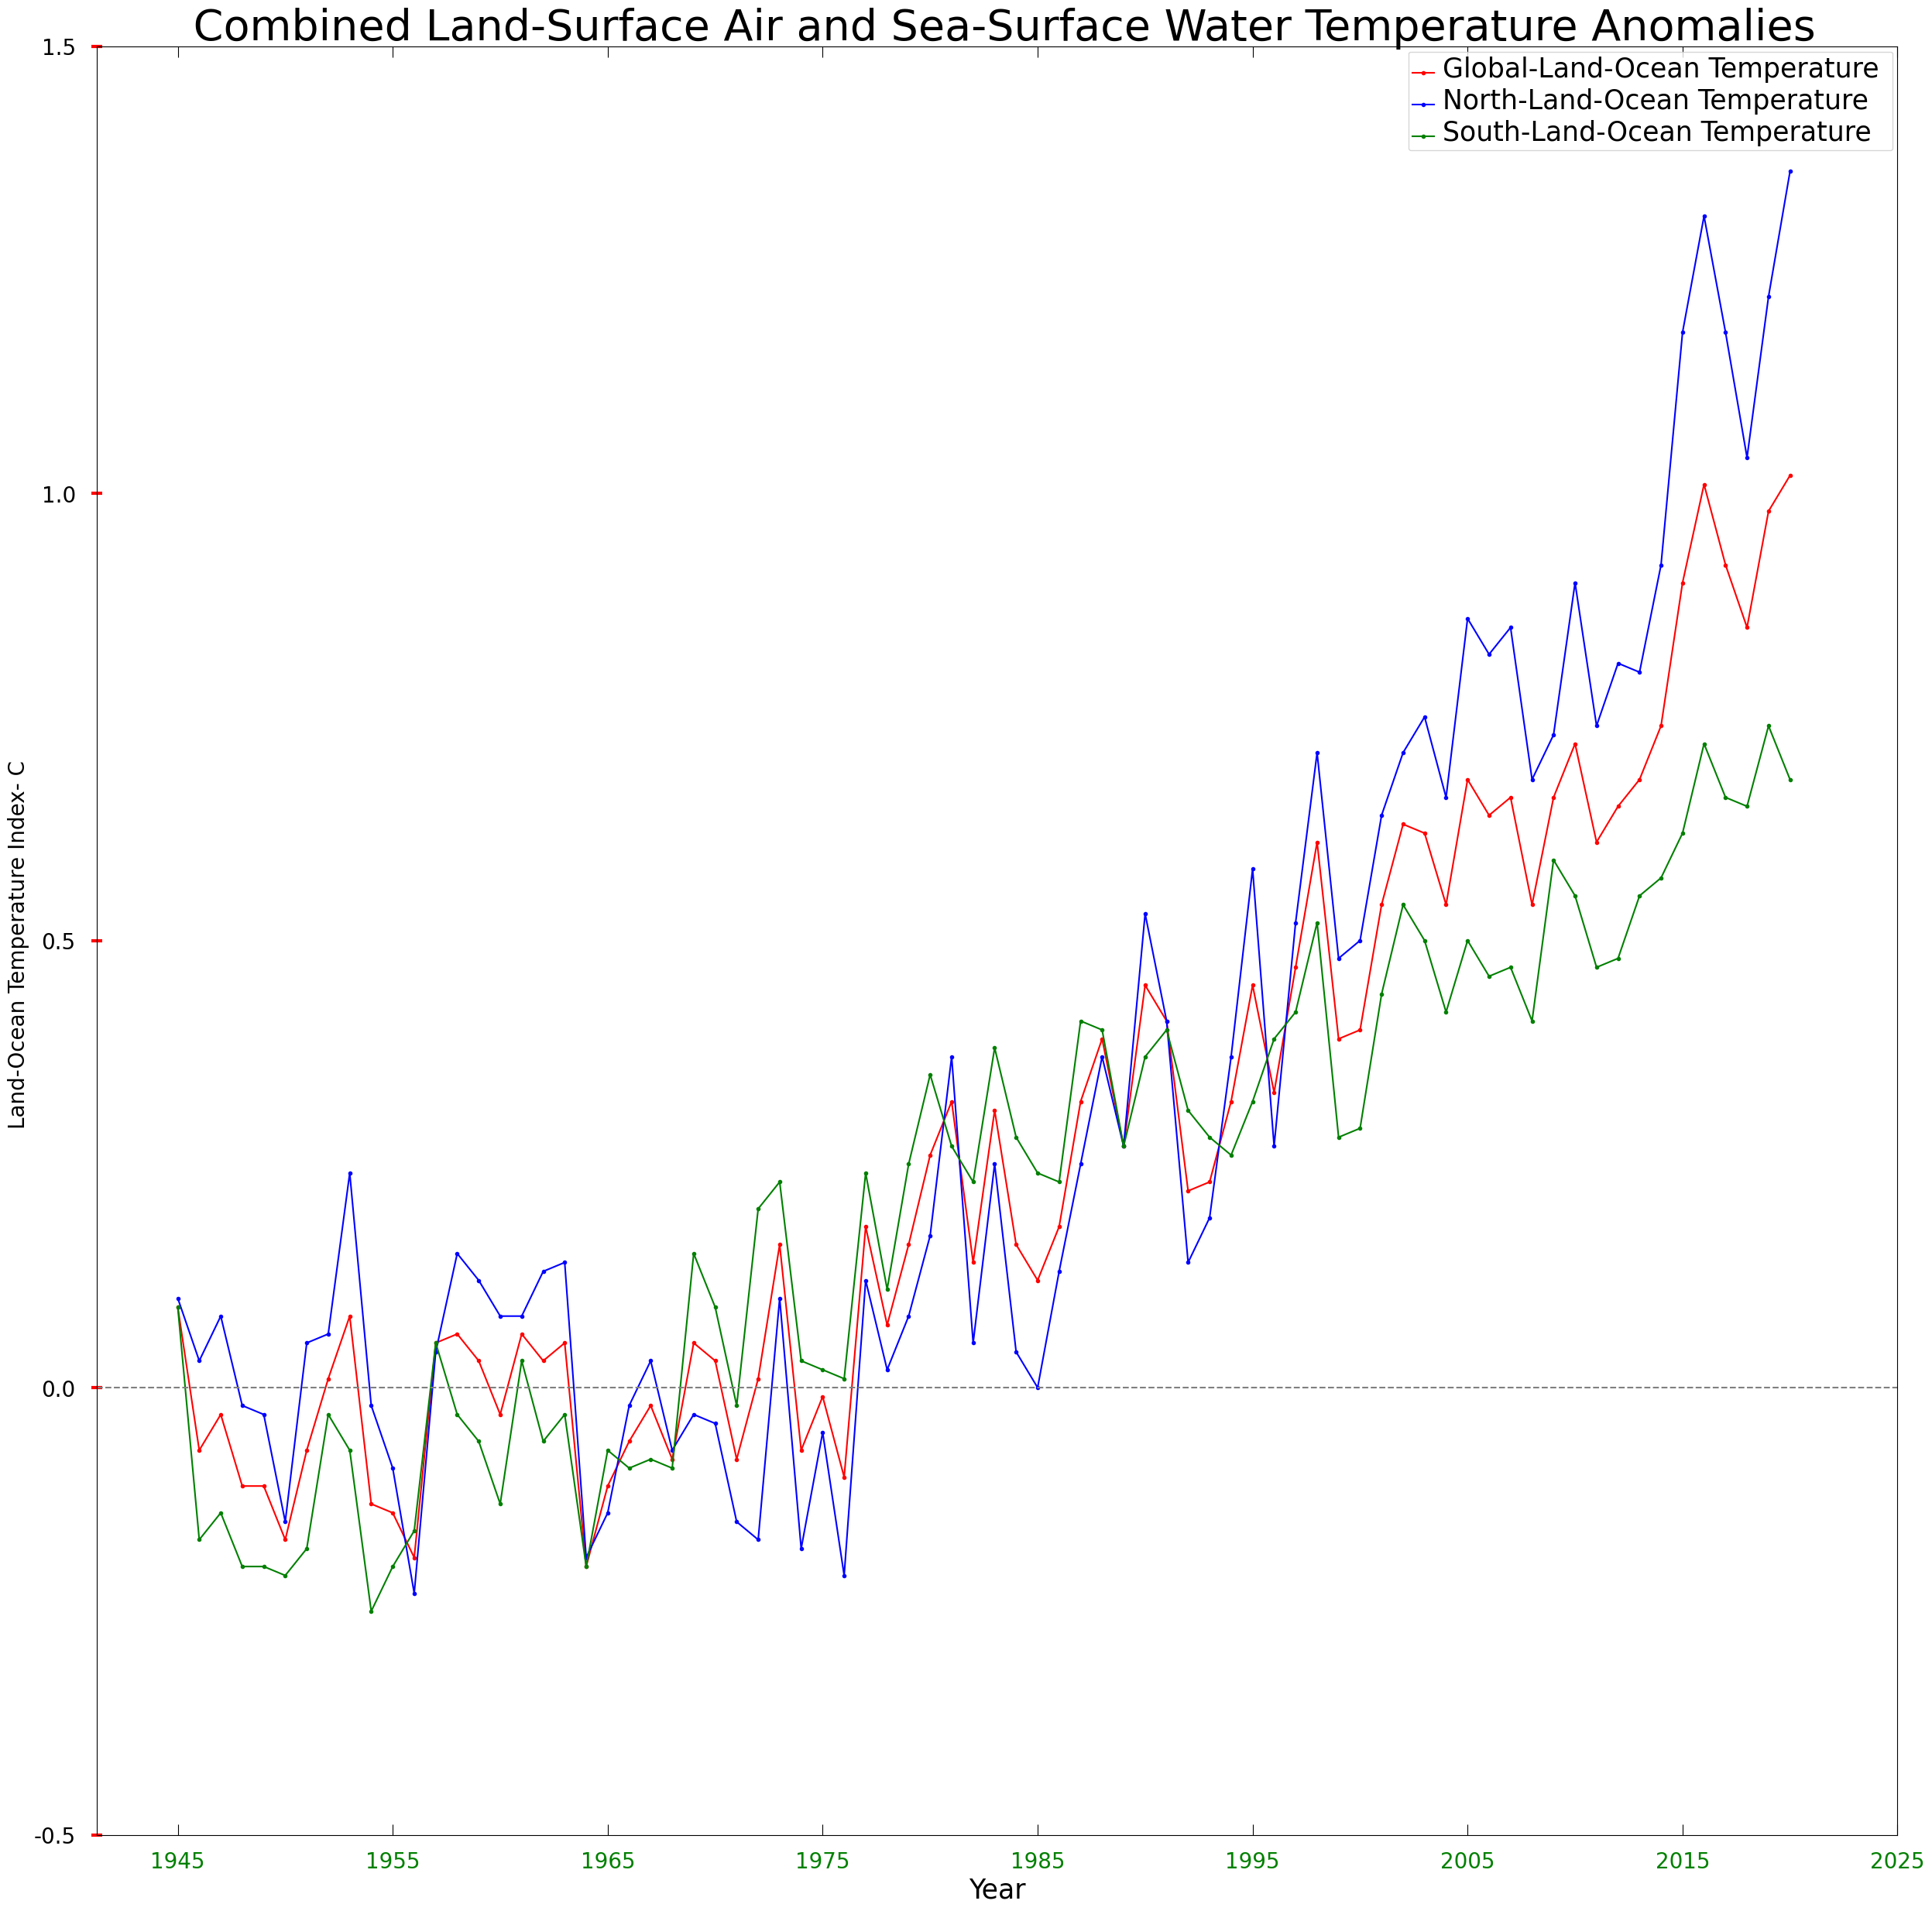

In [103]:
plt.style.use('default')
plt.figure(figsize=(30,30))
plt.plot((df_global_resize['Year']), (df_global_resize_float) , 'r.-', label = 'Global-Land-Ocean Temperature ')
plt.plot((df_north_resize['Year']), (df_north_resize_float), 'b.-', label = 'North-Land-Ocean Temperature ')
plt.plot((df_south_resize['Year']), (df_south_resize_float), 'g.-', label = 'South-Land-Ocean Temperature ')

plt.xlabel('Year', fontsize = 25)   #x축 라벨
plt.ylabel('Land-Ocean Temperature Index- C ', fontsize = 20)  #y축 라벨
plt.axhline('0', color='gray', linestyle='--')
legend = plt.legend()
plt.setp(legend.get_texts(), color='black', fontsize=25) #라벨표시

plt.xticks(np.arange(1945, 2035 , 10),(np.arange(1945,2035,10)))   #X축 눈금 표시
plt.yticks(np.arange(-0.5, 2 , 0.5),(np.arange(-0.5, 2,0.5)))   #Y축 눈금 표시

plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=20, width=3, color='r')   # Y눈금 스타일
plt.tick_params(axis='x', direction='in', length=10, pad=15, labelsize=20, labelcolor='green', top=True)  # X눈금 스타일

plt.title(" Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies",fontsize=40)  # 차트 타이틀
plt.show()

#### 박상우 파트

#### Data_Source_URL:  "https://www.kaggle.com/jnegrini/emdat19002021"
    
"The credit for creating and maintaining the Database is for the Centre for Research on the Epidemiology of Disasters - CRED and the School of Public Health from the Université catholique de Louvain."

'“EM-DAT, CRED / UCLouvain, Brussels, Belgium – www.emdat.be (D. Guha-Sapir)”'

#### *데이터 적재

In [104]:
df = pd.read_csv('EMDAT_1900-2021_NatDis.csv')
df

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902-0012-GTM,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,...,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902-0003-GTM,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902-0010-GTM,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15822,2020-0031-ZMB,2020,31,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,NaN,NaN,NaN,1500.0,NaN,1500.0,NaN,NaN,NaN,NaN
15823,2020-0110-ZMB,2020,110,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,26.0,NaN,NaN,700000.0,NaN,700000.0,NaN,NaN,NaN,NaN
15824,2021-0036-ZWE,2021,36,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Eloise',Kill,...,23.0,3.0,NaN,1745.0,NaN,1745.0,NaN,NaN,NaN,NaN
15825,2020-0131-TLS,2020,131,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affected,...,13.0,3.0,7.0,9124.0,NaN,9131.0,NaN,NaN,20000.0,NaN


#### *데이터 변형

In [105]:
#인덱스 = 년도
df.index = df["Year"]

In [106]:
 year = df.index > 1944

In [107]:
df2 = df[year] #필요한 연도로 자르기
df2

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
Year,,,,,,,,,,,,,,,,,,,,,
1945,1945-0009-BEL,1945,9,Natural,Biological,Epidemic,Viral disease,NaN,Polio,Affect,...,NaN,NaN,NaN,104.0,NaN,104.0,NaN,NaN,NaN,7.057646
1945,1945-0004-BHS,1945,4,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Kill,...,14.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.057646
1945,1945-0005-IND,1945,5,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,OFDA,...,18.0,NaN,NaN,NaN,2000.0,2000.0,NaN,NaN,NaN,7.057646
1946,1946-0013-CHL,1946,13,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,OFDA,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.644696
1946,1946-0021-DOM,1946,21,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,...,4.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.644696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2020-0031-ZMB,2020,31,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,NaN,NaN,NaN,1500.0,NaN,1500.0,NaN,NaN,NaN,NaN
2020,2020-0110-ZMB,2020,110,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,26.0,NaN,NaN,700000.0,NaN,700000.0,NaN,NaN,NaN,NaN
2021,2021-0036-ZWE,2021,36,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Eloise',Kill,...,23.0,3.0,NaN,1745.0,NaN,1745.0,NaN,NaN,NaN,NaN


#### 자연재해 종류별 분포율

In [108]:
df3 = df2["Disaster Type"].value_counts()
df3

Flood                    5364
Storm                    4299
Epidemic                 1472
Earthquake               1312
Landslide                 753
Drought                   726
Extreme temperature       599
Wildfire                  448
Volcanic activity         239
Insect infestation         93
Mass movement (dry)        44
Glacial lake outburst       1
Impact                      1
Fog                         1
Animal accident             1
Name: Disaster Type, dtype: int64

Text(0.5, 1.0, 'Natural Disasters 1945-2021')

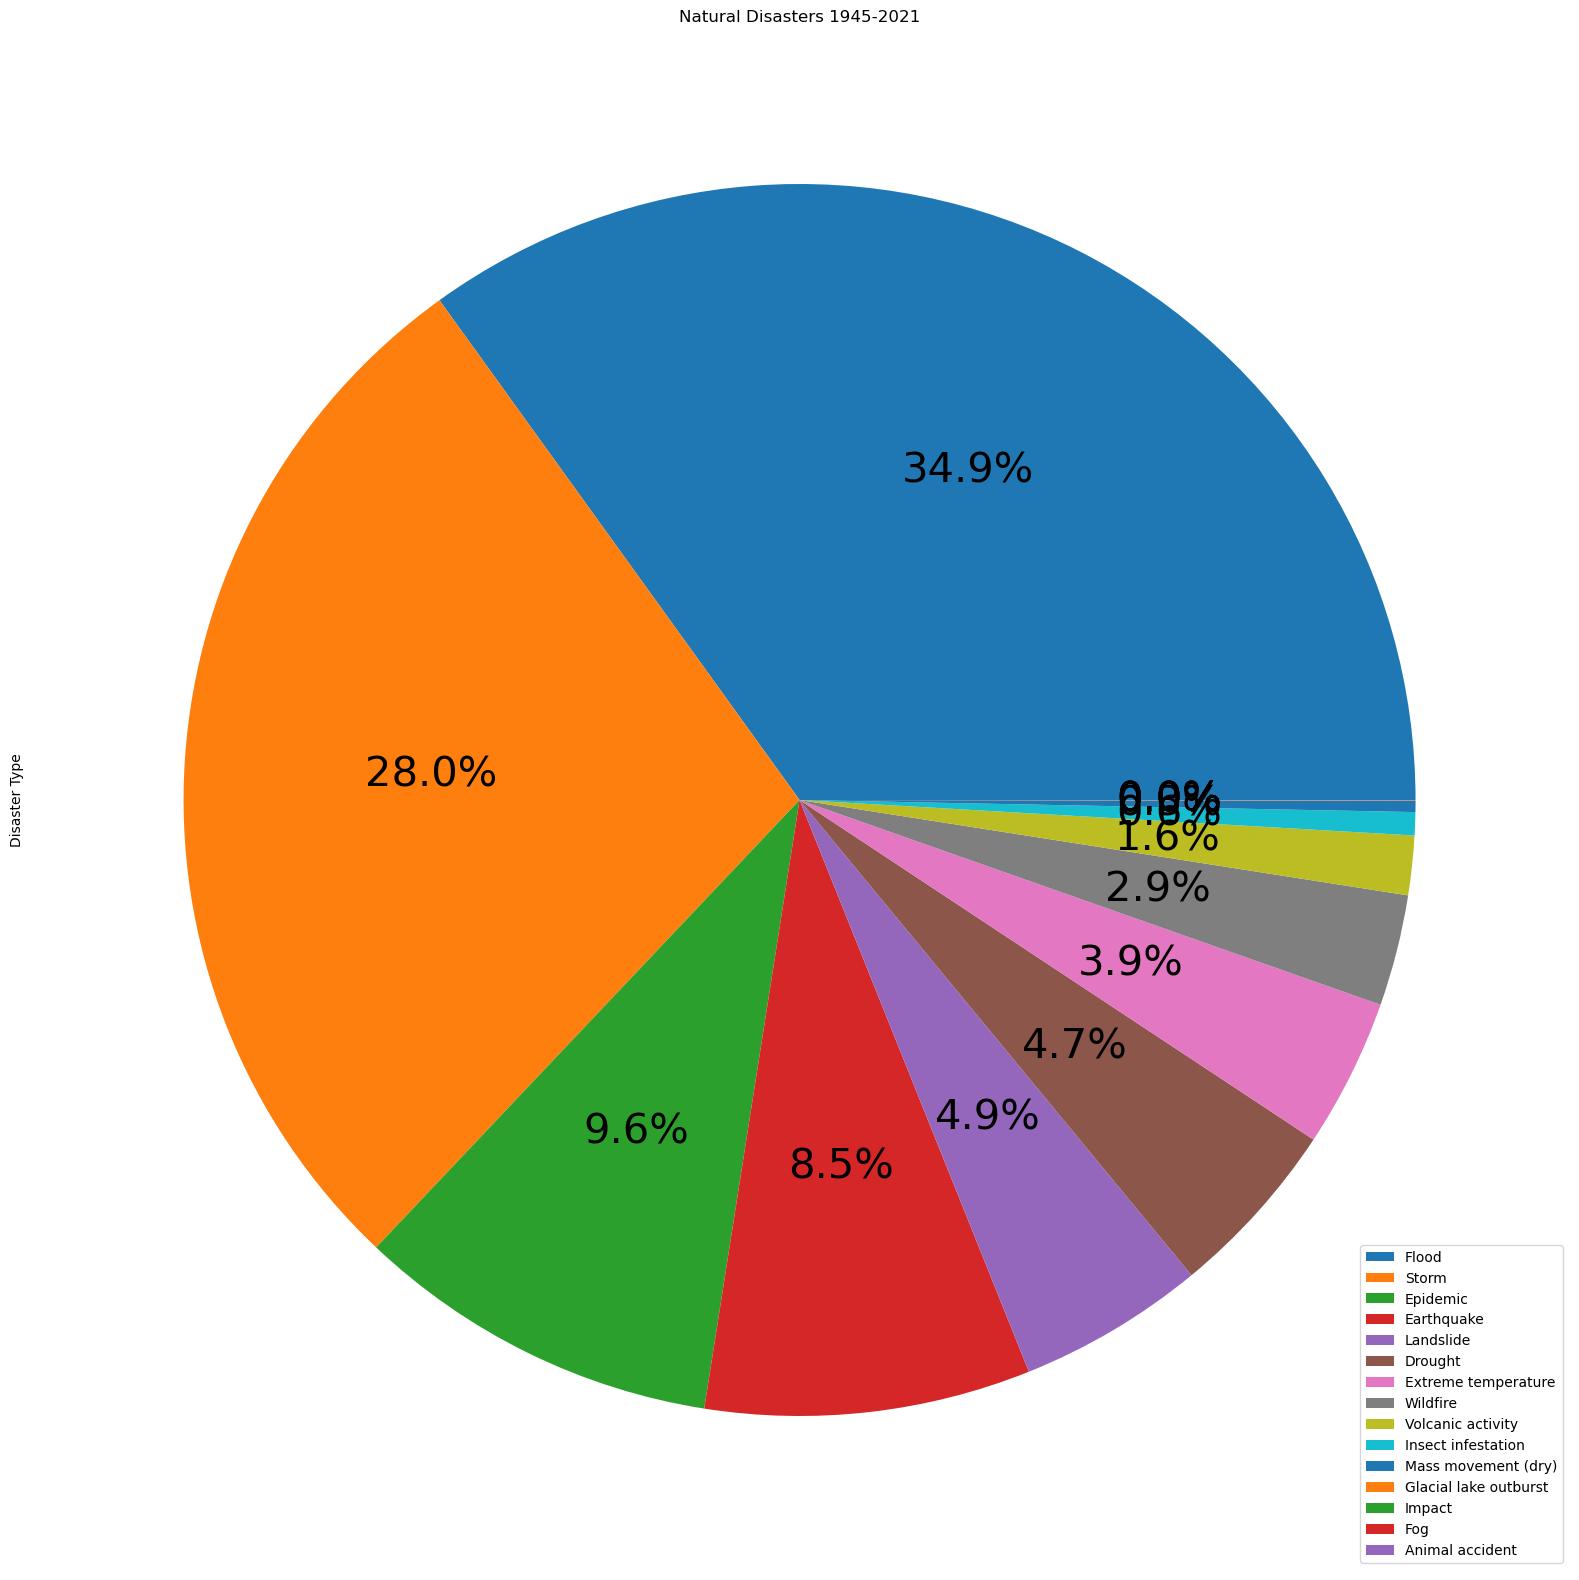

In [109]:
df3.plot(kind = "pie", figsize = (20, 20), autopct = "%1.1f%%", subplots=True, labeldistance=None, legend=True, fontsize=30)
plt.title("Natural Disasters 1945-2021")

#### 연도별 자연재해 발생 횟수

In [110]:
years_of_disasters = df2["Year"].value_counts()
years_of_disasters

2002    532
2000    523
2005    498
2007    449
2001    447
       ... 
1958     24
1949     21
1946     17
1945     17
1947     14
Name: Year, Length: 77, dtype: int64

#### 전 세계 연 평균 재해 횟수

In [111]:
years_of_disasters.mean()

199.3896103896104

In [112]:
sorted_years_of_disasters = years_of_disasters.sort_index(level=1, ascending=False)
sorted_years_of_disasters

2021     27
2020    397
2019    443
2018    336
2017    367
       ... 
1949     21
1948     25
1947     14
1946     17
1945     17
Name: Year, Length: 77, dtype: int64

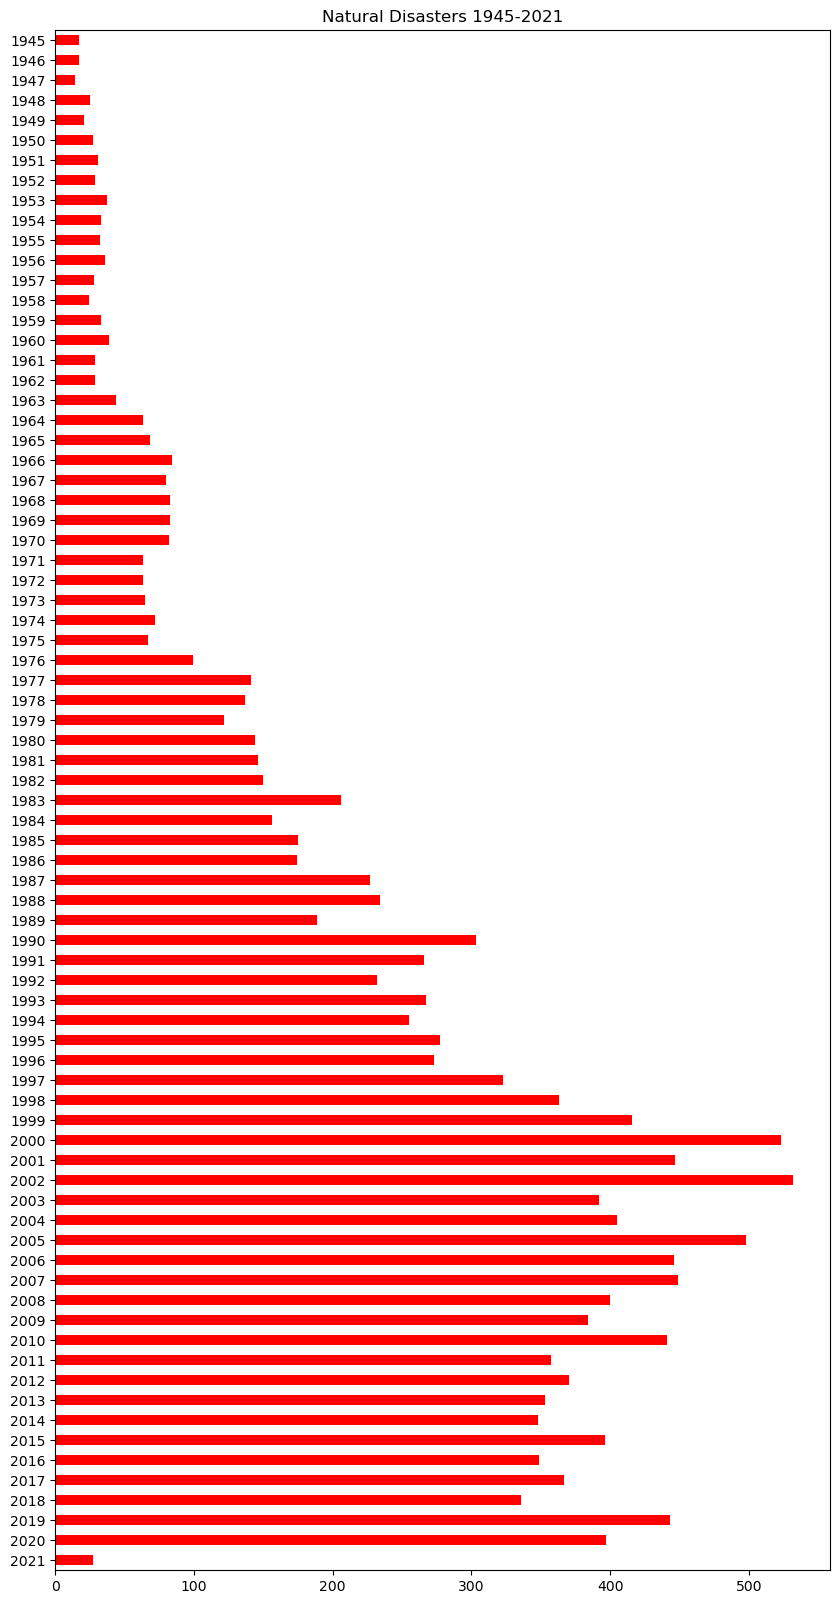

In [113]:
sorted_years_of_disasters.plot(kind="barh", figsize=(10,20), color="red")
plt.title("Natural Disasters 1945-2021")
plt.show()

#### 연도별 사망자 수 집계

In [114]:
death_count_by_years = df2.groupby("Start Year")['Total Deaths'].sum()
death_count_by_years

Start Year
1945     11358.0
1946     35563.0
1947     17650.0
1948    120828.0
1949    123774.0
          ...   
2017     11895.0
2018     15217.0
2019     22452.0
2020     15316.0
2021       509.0
Name: Total Deaths, Length: 77, dtype: float64

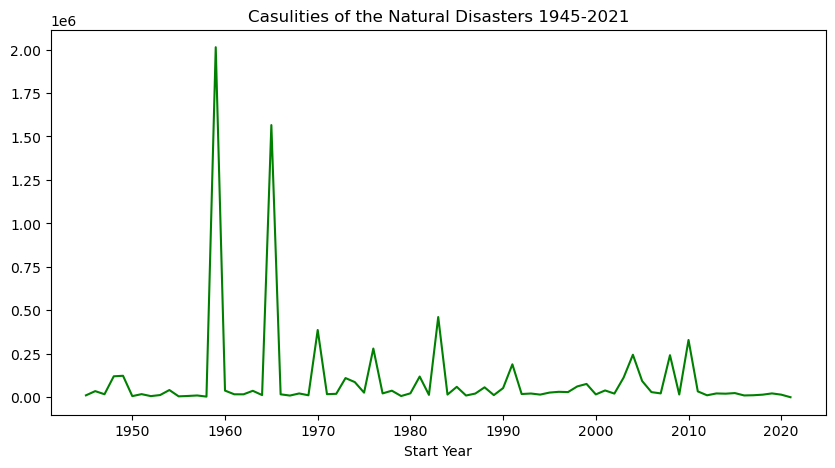

In [115]:
death_count_by_years.plot(kind="line", figsize=(10,5), color="Green")
plt.title("Casulities of the Natural Disasters 1945-2021")
plt.show()

<AxesSubplot:xlabel='Start Year', ylabel='Total Deaths'>

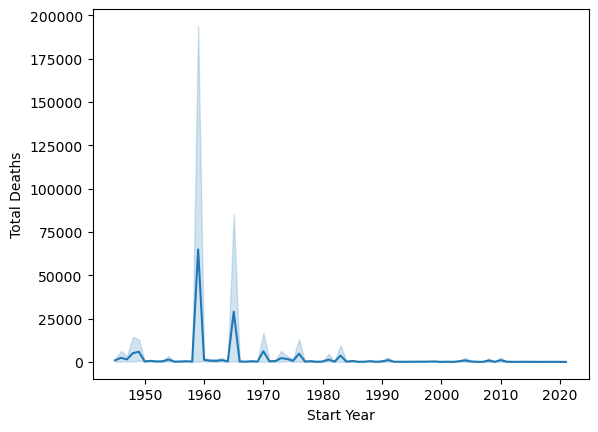

In [116]:
sns.lineplot(data=df2, x="Start Year", y="Total Deaths")

#### 최대 사망자 TOP3:
#### 1위. 1959년 황허강 홍수: 중하류의 400km이상의 강에서 범람. 2주동안 하루에 100mm가 넘는 비가 내려 최대사상자.
#### 2위. 1965년 인도 가뭄
#### 3위. 1983년 에티오피아 가뭄

In [117]:
killed_top3 = df2["Total Deaths"].dropna().sort_values(ascending=False)[:3]
killed_top3

Year
1959    2000000.0
1965    1500000.0
1983     300000.0
Name: Total Deaths, dtype: float64

#### 대륙 별 자연재해 발생 건수

In [118]:
df6 = df2["Continent"]
df6

Year
1945      Europe
1945    Americas
1945        Asia
1946    Americas
1946    Americas
          ...   
2020      Africa
2020      Africa
2021      Africa
2020        Asia
2020      Africa
Name: Continent, Length: 15353, dtype: object

In [119]:
df7 = df6.value_counts()
df7

Asia        6155
Americas    3740
Africa      2863
Europe      1903
Oceania      692
Name: Continent, dtype: int64

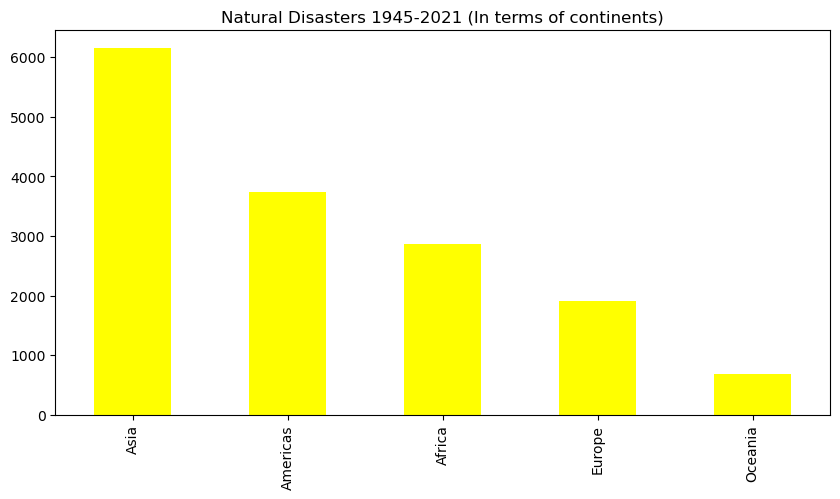

In [120]:
df7.plot(kind="bar", figsize=(10,5), color="Yellow")
plt.title("Natural Disasters 1945-2021 (In terms of continents)")
plt.show()

#### 대륙별 누적 사망자 통계

In [121]:
df8 = df2.groupby("Continent")['Total Deaths'].sum()
df8

Continent
Africa       984590.0
Americas     620353.0
Asia        5907753.0
Europe       340934.0
Oceania       14798.0
Name: Total Deaths, dtype: float64

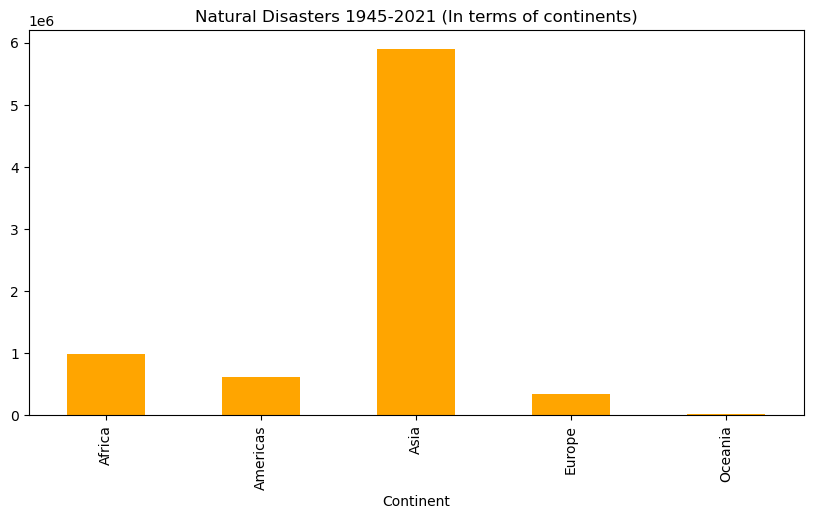

In [122]:
df8.plot(kind="bar", figsize=(10,5), color="Orange")
plt.title("Natural Disasters 1945-2021 (In terms of continents)")
plt.show()

#### 대륙별 자연재해 발생빈도 TOP5

In [123]:
df9 = df2["Country"].value_counts()[:5]
df9 #Asia에서 벌어지는 대부분의 자연재해는 '중국'에서 발생한다는 것을 알 수 있다.

United States of America (the)    1016
China                              924
India                              718
Philippines (the)                  645
Indonesia                          542
Name: Country, dtype: int64

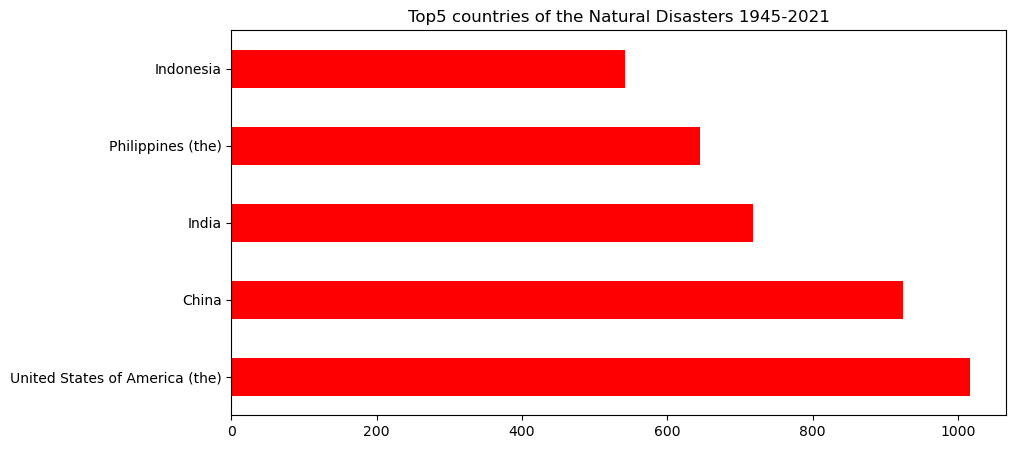

In [124]:
df9.plot(kind="barh", figsize=(10,5), color="red")
plt.title("Top5 countries of the Natural Disasters 1945-2021")
plt.show()

# 결론: 지구온난화 최대기여국은 미국이며, 최대 피해국은 중국이다.